In [1]:
import torch
import torch.nn as nn
import librosa.display
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython import display
import pandas as pd
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import sklearn as sk

/usr/local/lib/python3.9/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import scipy.io.wavfile as wav

In [5]:
from python_speech_features import mfcc
from matplotlib import cm

fig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_data, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
ax.set_title('MFCC')

plt.show()

In [8]:


###pytorch functions imported from https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html
########pytorch audio formatting functions

import os
import math


import librosa


import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import Audio, display

[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
  matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]

def _get_sample(path, resample=None):
  effects = [
    ["remix", "1"]
  ]
  if resample:
    effects.extend([
      ["lowpass", f"{resample // 2}"],
      ["rate", f'{resample}'],
    ])
  return torchaudio.sox_effects.apply_effects_file(path, effects=effects)

def get_speech_sample(*, resample=None):
  return _get_sample(SAMPLE_WAV_SPEECH_PATH, resample=resample)

def get_sample(*, resample=None):
  return _get_sample(SAMPLE_WAV_PATH, resample=resample)

def get_rir_sample(*, resample=None, processed=False):
  rir_raw, sample_rate = _get_sample(SAMPLE_RIR_PATH, resample=resample)
  if not processed:
    return rir_raw, sample_rate
  rir = rir_raw[:, int(sample_rate*1.01):int(sample_rate*1.3)]
  rir = rir / torch.norm(rir, p=2)
  rir = torch.flip(rir, [1])
  return rir, sample_rate

def get_noise_sample(*, resample=None):
  return _get_sample(SAMPLE_NOISE_PATH, resample=resample)

def print_stats(waveform, sample_rate=None, src=None):
  if src:
    print("-" * 10)
    print("Source:", src)
    print("-" * 10)
  if sample_rate:
    print("Sample Rate:", sample_rate)
  print("Shape:", tuple(waveform.shape))
  print("Dtype:", waveform.dtype)
  print(f" - Max:     {waveform.max().item():6.3f}")
  print(f" - Min:     {waveform.min().item():6.3f}")
  print(f" - Mean:    {waveform.mean().item():6.3f}")
  print(f" - Std Dev: {waveform.std().item():6.3f}")
  print()
  print(waveform)
  print()



def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)










In [9]:
#dataset processing and splitting
dfInput=pd.read_csv('/code/dataset/FakeAVCeleb/MergedMetadataLabeled.csv')
dfCut=dfInput[['wavLocation','Audio_Label','source','method','race','gender','type']]
dfCut2=dfInput[['wavLocation','Audio_Label','path']]
wavDir=dfCut2['wavLocation']
labelsdf=dfCut2[['wavLocation','Audio_Label']]
dfFake=dfCut[dfCut['Audio_Label']==1].reset_index(drop=True)
dfReal=dfCut[dfCut['Audio_Label']==0].reset_index(drop=True)
dfTraining=pd.concat([dfReal[0:8000],dfFake[0:8000]]).reset_index(drop=True)
dfValidation=pd.concat([dfReal[8000:],dfFake[8000:]]).reset_index(drop=True)
labelsTrain=dfTraining['Audio_Label']
labelsVal=dfValidation['Audio_Label']

In [9]:
dfReal['source']

0        id00076
1        id00166
2        id00173
3        id00366
4        id00391
          ...   
10204    id09181
10205    id09181
10206    id09181
10207    id09181
10208    id09181
Name: source, Length: 10209, dtype: object

In [10]:
#generate small sample of 100 real and 100 fake audio clips
id_List_Listen=dfReal['source'].sample(n=20,ignore_index=True,random_state=24)

listen_list_real=pd.DataFrame(columns=['source','wavLocation','Audio_Label'])
listen_list_fake=pd.DataFrame(columns=['source','wavLocation','Audio_Label'])
for i in range(0,len(id_List_Listen)):
    tempdf=dfReal[dfReal['source']==id_List_Listen[i]]
    listen_list_real=pd.concat([listen_list_real,tempdf])
    tempdf=dfFake[dfFake['source']==id_List_Listen[i]]
    listen_list_fake=pd.concat([listen_list_fake,tempdf])

#listen_list_real=listen_list_real['wavLocation']
#listen_list_fake=listen_list_fake['wavLocation']
listen_real=listen_list_real.sample(n=20,ignore_index=True,replace=True,random_state=24)
listen_fake=listen_list_fake.sample(n=20,ignore_index=True,replace=True,random_state=24)

In [ ]:
fake_mfccs=[]
for i in range(0,len(fake_data)):
    mfccs = librosa.feature.mfcc(fake_data[i], sr=fake_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.
    librosa.display.specshow(mfccs, sr=fake_sampling_rate[i], x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.show()
    print(mfccs.shape)
    fake_mfccs+=[mfccs]


In [53]:
dfReal

wavLocation  Audio_Label  \
0      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
1      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
2      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
3      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
4      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
...                                                  ...          ...   
10204  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0   
10205  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0   
10206  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0   
10207  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0   
10208  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0   

        source   method          race gender                 type  
0      id00076     real       African    men  RealVideo-RealAudio  
1      id00166     real       African    men  RealVideo-RealAudio  
2      id00173     real       African    men  RealVideo-RealAudio  
3      id00366     real       African    men  RealVideo-RealAudio  
4      id00391     real       African    men  RealVideo-RealAudio  
...        ...      ...           ...    ...                  ...  
10204  id09181  wav2lip  Asian (East)  women  FakeVideo-RealAudio  
10205  id09181  wav2lip  Asian (East)  women  FakeVideo-RealAudio  
10206  id09181  wav2lip  Asian (East)  women  FakeVideo-RealAudio  
10207  id09181  wav2lip  Asian (East)  women  FakeVideo-RealAudio  
10208  id09181  wav2lip  Asian (East)  women  FakeVideo-RealAudio  

[10209 rows x 7 columns]

In [50]:

#mfcc_avg=[]

#for i in 
mfcc_avg=torch.mean(mfcc[0],1).tolist()
mfcc_avg=[math.trunc(val) for val in mfcc_avg]
print(mfcc_avg)






####get averages for each mfcc score



####create class lists and take average values of each class, method, etc






######derive delta and delta deltas as well




[-242, 173, -34, 0, 23, -18, -2, 0, -19, 0, 2, -11, 0]


In [74]:
delta1



ComputeDeltas()

In [65]:
delta1=T.ComputeDeltas(mfcc[0])
delta2=T.ComputeDeltas(delta1)

In [77]:
delta1.foward

AttributeError: 'ComputeDeltas' object has no attribute 'foward'

In [76]:
T.ToTensor(delta1)

AttributeError: module 'torchaudio.transforms' has no attribute 'ToTensor'

TypeError: 'ComputeDeltas' object is not subscriptable

In [55]:
len(dfCut)

21566

['real' 'wav2lip' 'fsgan' 'faceswap']
['rtvc' 'faceswap-wav2lip' 'fsgan-wav2lip' 'wav2lip']
['African' 'Caucasian (American)' 'Asian (East)' 'Caucasian (European)'
 'Asian (South)']
['African' 'Caucasian (American)' 'Asian (East)' 'Caucasian (European)'
 'Asian (South)']


In [81]:
#####class split, split by method, gender, race, real/fake
mel_kwargs={'n_fft':400,'hop_length':160,'n_mels':64,'center':False}
df_mfcc=dfCut
df_mfcc['mfcc']=""
for i in range(0,len(dfCut)):
    audio, fs = torchaudio.load(dfCut['wavLocation'][i])
    mfcc_t=T.MFCC(sample_rate=fs/2,melkwargs=mel_kwargs,n_mfcc=13)
    mfcc=mfcc_t(audio)
    mfcc_avg=torch.mean(mfcc[0],1).tolist()
    mfcc_avg=[math.trunc(val) for val in mfcc_avg]
    df_mfcc['mfcc'][i]=mfcc_avg
   


/tmp/ipykernel_29921/2363413133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mfcc['mfcc']=""
/tmp/ipykernel_29921/2363413133.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mfcc['mfcc'][i]=mfcc_avg


In [84]:
#df_mfcc.to_csv('/code/dataset/FakeAVCeleb/mfcc_classes.csv')
print(dfReal['method'].unique())
print(dfFake['method'].unique())
print(dfReal['race'].unique())
print(dfFake['race'].unique())

['real' 'wav2lip' 'fsgan' 'faceswap']
['rtvc' 'faceswap-wav2lip' 'fsgan-wav2lip' 'wav2lip']
['African' 'Caucasian (American)' 'Asian (East)' 'Caucasian (European)'
 'Asian (South)']
['African' 'Caucasian (American)' 'Asian (East)' 'Caucasian (European)'
 'Asian (South)']


In [89]:
dfMethod_4

wavLocation  Audio_Label   source  \
0    /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0  id00018   
1    /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0  id00018   
2    /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0  id00020   
3    /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0  id00020   
4    /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0  id00021   
..                                                 ...          ...      ...   
725  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0  id09116   
726  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0  id09143   
727  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0  id09171   
728  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0  id09174   
729  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0  id09175   

       method                  race gender                 type  \
0    faceswap  Caucasian (American)    men  FakeVideo-RealAudio   
1    faceswap  Caucasian (American)    men  FakeVideo-RealAudio   
2    faceswap  Caucasian (American)    men  FakeVideo-RealAudio   
3    faceswap  Caucasian (American)    men  FakeVideo-RealAudio   
4    faceswap  Caucasian (American)    men  FakeVideo-RealAudio   
..        ...                   ...    ...                  ...   
725  faceswap          Asian (East)  women  FakeVideo-RealAudio   
726  faceswap          Asian (East)    men  FakeVideo-RealAudio   
727  faceswap          Asian (East)  women  FakeVideo-RealAudio   
728  faceswap          Asian (East)  women  FakeVideo-RealAudio   
729  faceswap          Asian (East)  women  FakeVideo-RealAudio   

                                                  mfcc  
0    [-280, 123, 11, 9, 16, 0, 5, 1, -12, -2, 0, -1...  
1    [-239, 170, -28, 8, 22, -12, 8, -2, -21, 5, 1,...  
2    [-318, 137, -14, 11, 30, 0, 5, 2, -12, -3, -6,...  
3    [-280, 126, -22, 23, 26, -13, 12, 8, -15, 0, 1...  
4    [-191, 155, -34, 12, 22, -17, 7, 0, -20, 2, -3...  
..                                                 ...  
725  [-249, 142, 14, 13, 23, 0, 0, 2, -7, -1, -1, -...  
726  [-226, 138, -46, 4, 26, -10, 12, 8, -16, 1, 1,...  
727  [-210, 147, -13, 10, 24, -11, 0, 0, -14, -1, -...  
728  [-288, 102, -1, 18, 25, -6, -2, 3, -6, -1, 0, ...  
729  [-327, 152, 8, -14, 25, 14, -15, -7, 3, -8, -1...  

[730 rows x 8 columns]

In [99]:
dfMethod_1

wavLocation  Audio_Label   source  \
0    /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0  id00076   
1    /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0  id00166   
2    /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0  id00173   
3    /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0  id00366   
4    /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0  id00391   
..                                                 ...          ...      ...   
495  /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0  id07136   
496  /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0  id07236   
497  /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0  id07377   
498  /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0  id07686   
499  /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0  id07689   

    method           race gender                 type  \
0     real        African    men  RealVideo-RealAudio   
1     real        African    men  RealVideo-RealAudio   
2     real        African    men  RealVideo-RealAudio   
3     real        African    men  RealVideo-RealAudio   
4     real        African    men  RealVideo-RealAudio   
..     ...            ...    ...                  ...   
495   real  Asian (South)  women  RealVideo-RealAudio   
496   real  Asian (South)  women  RealVideo-RealAudio   
497   real  Asian (South)  women  RealVideo-RealAudio   
498   real  Asian (South)  women  RealVideo-RealAudio   
499   real  Asian (South)  women  RealVideo-RealAudio   

                                                  mfcc    1    2  ...   4   5  \
0    [-258, 140, -31, 14, 28, -16, 3, 11, -8, -1, -... -258  140  ...  14  28   
1    [-226, 155, 13, 14, 15, -12, 4, 8, -11, -2, 2,... -226  155  ...  14  15   
2    [-207, 143, -11, 10, 28, -5, 0, 1, -10, -1, 0,... -207  143  ...  10  28   
3    [-276, 146, -13, 13, 31, -4, 7, 9, -12, -5, 0,... -276  146  ...  13  31   
4    [-283, 154, -45, 30, 33, -24, 12, 11, -8, 12, ... -283  154  ...  30  33   
..                                                 ...  ...  ...  ...  ..  ..   
495  [-178, 145, -15, -2, 19, -13, -8, 3, -7, -7, -... -178  145  ...  -2  19   
496  [-257, 147, -14, 7, 18, -8, 7, 0, -13, 3, -1, ... -257  147  ...   7  18   
497  [-235, 134, -1, -5, 19, 3, -5, -4, -4, -1, -4,... -235  134  ...  -5  19   
498  [-184, 143, 14, 10, 15, -7, -4, -8, -15, 0, 0,... -184  143  ...  10  15   
499  [-206, 163, 12, -4, 19, 6, -6, -9, -5, 1, -7, ... -206  163  ...  -4  19   

      6   7   8   9  10  11  12  13  
0   -16   3  11  -8  -1  -5 -10   0  
1   -12   4   8 -11  -2   2  -7   0  
2    -5   0   1 -10  -1   0  -7  -1  
3    -4   7   9 -12  -5   0  -8  -4  
4   -24  12  11  -8  12   0  -9   5  
..   ..  ..  ..  ..  ..  ..  ..  ..  
495 -13  -8   3  -7  -7  -3  -3   1  
496  -8   7   0 -13   3  -1 -11   2  
497   3  -5  -4  -4  -1  -4  -6   1  
498  -7  -4  -8 -15   0   0  -5   3  
499   6  -6  -9  -5   1  -7 -10   2  

[500 rows x 21 columns]

In [100]:
#split out each coefficient into its own column: easier for avg calculations

df_mfcc[['1','2','3','4','5','6','7','8','9','10','11','12','13']]=pd.DataFrame(df_mfcc.mfcc.tolist(),index=df_mfcc.index)

/tmp/ipykernel_29921/1287420573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mfcc[['1','2','3','4','5','6','7','8','9','10','11','12','13']]=pd.DataFrame(df_mfcc.mfcc.tolist(),index=df_mfcc.index)
/tmp/ipykernel_29921/1287420573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mfcc[['1','2','3','4','5','6','7','8','9','10','11','12','13']]=pd.DataFrame(df_mfcc.mfcc.tolist(),index=df_mfcc.index)
/tmp/ipykernel_29921/1287420573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a co

In [101]:
###split mfcc scores


##real/fake
dfFake=df_mfcc[df_mfcc['Audio_Label']==1].reset_index(drop=True)
dfReal=df_mfcc[df_mfcc['Audio_Label']==0].reset_index(drop=True)
#method
dfMethod_1=df_mfcc[df_mfcc['method']=='real'].reset_index(drop=True)
dfMethod_2=df_mfcc[df_mfcc['method']=='wav2lip'].reset_index(drop=True)
dfMethod_3=df_mfcc[df_mfcc['method']=='fsgan'].reset_index(drop=True)
dfMethod_4=df_mfcc[df_mfcc['method']=='faceswap'].reset_index(drop=True)
dfMethod_5=df_mfcc[df_mfcc['method']=='rtvc'].reset_index(drop=True)
dfMethod_6=df_mfcc[df_mfcc['method']=='faceswap-wav2lip'].reset_index(drop=True)
dfMethod_7=df_mfcc[df_mfcc['method']=='fsgan-wav2lip'].reset_index(drop=True)
#gender
df_Men=df_mfcc[df_mfcc['gender']=='men'].reset_index(drop=True)
df_Women=df_mfcc[df_mfcc['gender']=='women'].reset_index(drop=True)
#race
df_African=df_mfcc[df_mfcc['race']=='African'].reset_index(drop=True)
df_Caucasian_American=df_mfcc[df_mfcc['race']=='Caucasian (American)'].reset_index(drop=True)
df_Asia_East=df_mfcc[df_mfcc['race']=='Asian (East)'].reset_index(drop=True)
df_Caucasian_European=df_mfcc[df_mfcc['race']=='Caucasian (European)'].reset_index(drop=True)
df_Asia_South=df_mfcc[df_mfcc['race']=='Asian (South)'].reset_index(drop=True)

In [156]:
def avg_class_mfcc(df):
    col_list=['1','2','3','4','5','6','7','8','9','10','11','12','13']
    avg_list=[]
    var_list=[]
    for i in range(0,13):
        avg_list.append(round(df[col_list[i]].mean(),2))
        var_list.append(round(df[col_list[i]].var(),2))
    #avg_list=[round(df['1'].mean(),2),round(df['2'].mean(),2),round(df['3'].mean(),df['4'].mean(),df['5'].mean(),
    #df['6'].mean(),df['7'].mean(),df['8'].mean(),df['9'].mean(),df['10'].mean(),df['11'].mean(),df['12'].mean(),df['13'].mean()]
    return avg_list,var_list

In [163]:
np.linspace(1,50,200).shape

(200,)

In [160]:
def normal_dist(x , mean , sd):
    prob_density= (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

2675.2854310813095
1331.083612067207


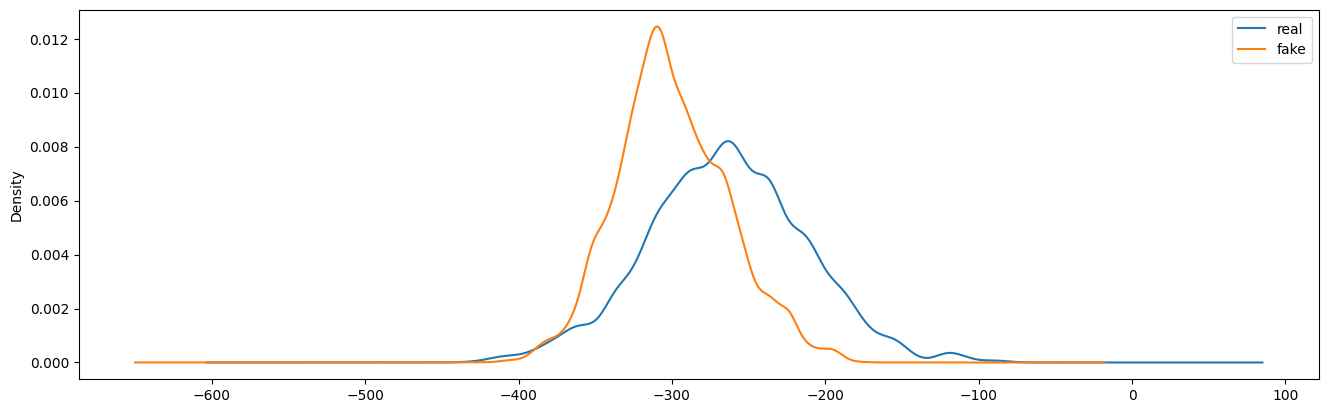

In [176]:
df=pd.DataFrame({'real':dfReal['1'],'fake':dfFake['1']})
df.plot.kde()
print(df['real'].var())
print(df['fake'].var())

In [166]:
dfReal['2'].shape

(10209,)

In [106]:
list_prac=avg_class_mfcc(df_African)
print(list_prac)

[-282.27, 136.58, -8.69, 11.07, 23.18, -6.64, 4.39, 5.65, -9.35, -0.3, 0.33, -7.39, -0.2]


In [110]:
import matplotlib.ticker as ticker

In [158]:
print(real_var)
print(fake_var)

[2675.29, 211.78, 309.47, 105.57, 49.49, 62.09, 35.08, 24.71, 23.17, 15.21, 11.71, 12.24, 10.21]
[1331.08, 305.83, 215.69, 59.99, 40.84, 43.55, 24.91, 25.5, 17.25, 12.5, 9.61, 8.27, 9.7]


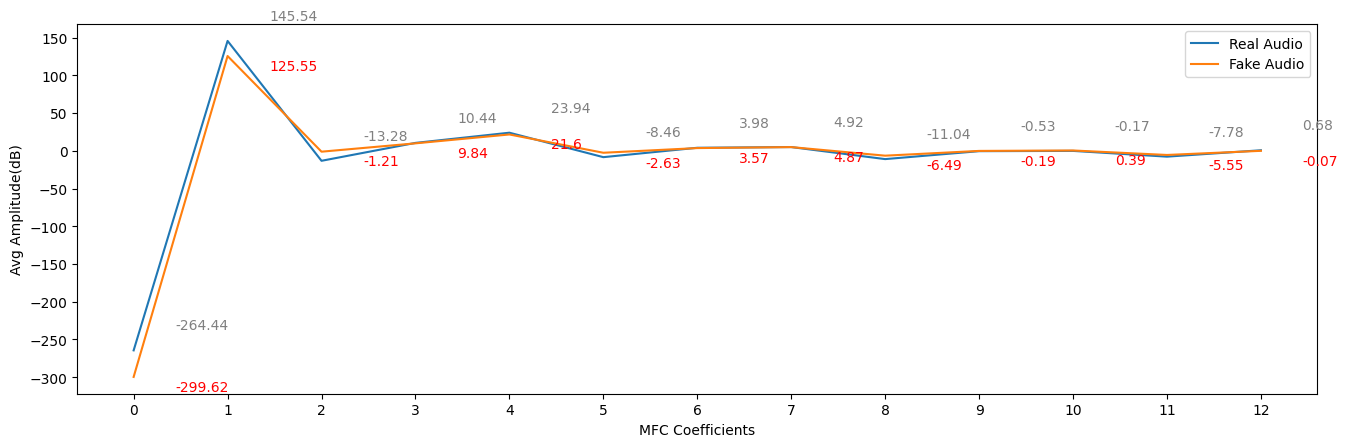

In [157]:
###plot the average numbers for real and fake classes 
Real_Audio,real_var=avg_class_mfcc(dfReal)
Fake_Audio,fake_var=avg_class_mfcc(dfFake)
Coefficients=list(range(13))



#plt.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
#plt.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
fig = plt.figure()
ax=fig.add_subplot(111)
plt.plot(Coefficients,Real_Audio,label='Real Audio')
plt.plot(Coefficients,Fake_Audio,label='Fake Audio')
for i,j in zip(Coefficients,Real_Audio):
    #ax.annotate('%s' %j, xy=(i,j), xytext=(30,0), textcoords='offset points')
    ax.annotate('%s' %j, xy=(i,j), xytext=(30,15), textcoords='offset points',color="gray")
    #ax.annotate('(%s,' %i, xy=(i,j))
for i,j in zip(Coefficients,Fake_Audio):
    #ax.annotate('%s' %j, xy=(i,j), xytext=(30,0), textcoords='offset points')
    ax.annotate('%s' %j, xy=(i,j), xytext=(30,-10), textcoords='offset points',color="red")
    #ax.annotate('(%s,' %i, xy=(i,j))
plt.xticks(np.arange(min(Coefficients), max(Coefficients)+1, 1.0))
plt.yticks(np.arange(round(min(Fake_Audio),0), round(max(Real_Audio)+50,0), 50))
plt.xlabel('MFC Coefficients')
plt.ylabel('Avg Amplitude(dB)')
plt.legend()






In [150]:
a=list(range(13))
a.pop(0)
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


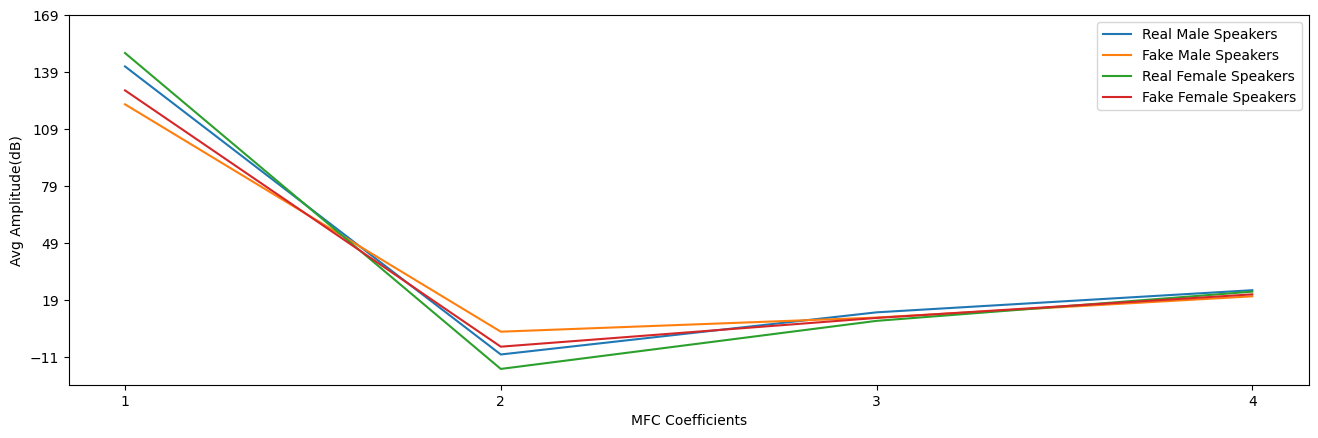

In [155]:
###plot the average numbers for real and fake classes 
Real_Audio_M=avg_class_mfcc(df_Men[df_Men['Audio_Label']==0])
Fake_Audio_M=avg_class_mfcc(df_Men[df_Men['Audio_Label']==1])
Real_Audio_F=avg_class_mfcc(df_Women[df_Women['Audio_Label']==0])
Fake_Audio_F=avg_class_mfcc(df_Women[df_Women['Audio_Label']==1])
Coefficients=list(range(13))
#Real_Audio_M.pop(0)
#Fake_Audio_M.pop(0)
#Real_Audio_F.pop(0)
#Fake_Audio_F.pop(0)
#Coefficients.pop(0)
#plt.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
#plt.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
fig = plt.figure()
ax=fig.add_subplot(111)
plt.plot(Coefficients[1:5],Real_Audio_M[1:5],label='Real Male Speakers')
plt.plot(Coefficients[1:5],Fake_Audio_M[1:5],label='Fake Male Speakers')
plt.plot(Coefficients[1:5],Real_Audio_F[1:5],label='Real Female Speakers')
plt.plot(Coefficients[1:5],Fake_Audio_F[1:5],label='Fake Female Speakers')
#for i,j in zip(Coefficients,Real_Audio):
    #ax.annotate('%s' %j, xy=(i,j), xytext=(30,0), textcoords='offset points')
    #ax.annotate('%s' %j, xy=(i,j), xytext=(30,15), textcoords='offset points',color="gray")
    #ax.annotate('(%s,' %i, xy=(i,j))
#for i,j in zip(Coefficients,Fake_Audio):
    #ax.annotate('%s' %j, xy=(i,j), xytext=(30,0), textcoords='offset points')
    #ax.annotate('%s' %j, xy=(i,j), xytext=(30,-10), textcoords='offset points',color="red")
    #ax.annotate('(%s,' %i, xy=(i,j))
plt.xticks(np.arange(min(Coefficients[1:5]), max(Coefficients[1:5])+1, 1.0))
plt.yticks(np.arange(round(min(Fake_Audio[1:5]),0), round(max(Real_Audio[1:5])+50,0), 30))
plt.xlabel('MFC Coefficients')
plt.ylabel('Avg Amplitude(dB)')
plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')
plt.legend()

        


In [93]:
df_Men['mean']=[np.array(x).mean() for x in df_Men['mfcc'].values]

In [ ]:
df_African=df_mfcc[df_mfcc['race']=='African'].reset_index(drop=True)
df_Caucasian_American=df_mfcc[df_mfcc['race']=='Caucasian (American)'].reset_index(drop=True)
df_Asia_East=df_mfcc[df_mfcc['race']=='Asian (East)'].reset_index(drop=True)
df_Caucasian_European=df_mfcc[df_mfcc['race']=='Caucasian (European)'].reset_index(drop=True)
df_Asia_South

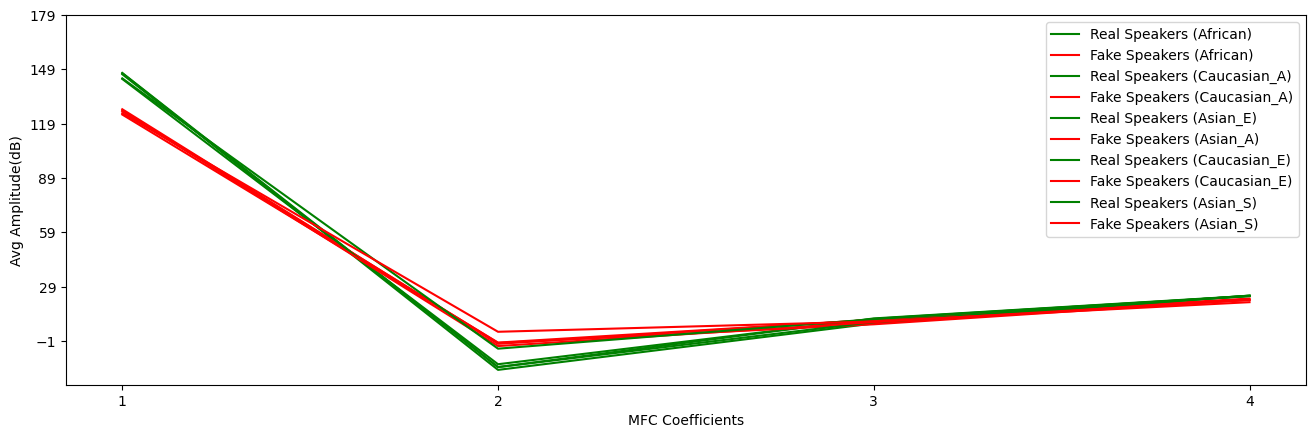

In [178]:
###plot the average numbers for real and fake classes 
R_AF,_=avg_class_mfcc(df_African[df_African['Audio_Label']==0])
F_AF,_=avg_class_mfcc(df_African[df_African['Audio_Label']==1])
R_CA,_=avg_class_mfcc(df_Caucasian_American[df_Caucasian_American['Audio_Label']==0])
F_CA,_=avg_class_mfcc(df_Caucasian_American[df_Caucasian_American['Audio_Label']==1])
R_AE,_=avg_class_mfcc(df_Asia_East[df_Asia_East['Audio_Label']==0])
F_AE,_=avg_class_mfcc(df_Asia_East[df_Asia_East['Audio_Label']==1])
R_CE,_=avg_class_mfcc(df_Caucasian_European[df_Caucasian_European['Audio_Label']==0])
F_CE,_=avg_class_mfcc(df_Caucasian_European[df_Caucasian_European['Audio_Label']==1])
R_AS,_=avg_class_mfcc(df_Asia_South[df_Asia_South['Audio_Label']==0])
F_AS,_=avg_class_mfcc(df_Asia_South[df_Asia_South['Audio_Label']==1])

Coefficients=list(range(13))
#Real_Audio_M.pop(0)
#Fake_Audio_M.pop(0)
#Real_Audio_F.pop(0)
#Fake_Audio_F.pop(0)
#Coefficients.pop(0)
#plt.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
#plt.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
fig = plt.figure()
ax=fig.add_subplot(111)
plt.plot(Coefficients[1:5],R_AF[1:5],label='Real Speakers (African)',color='green')
plt.plot(Coefficients[1:5],F_AF[1:5],label='Fake Speakers (African)',color=' dark red')
plt.plot(Coefficients[1:5],R_CA[1:5],label='Real Speakers (Caucasian_A)',color='green')
plt.plot(Coefficients[1:5],F_CA[1:5],label='Fake Speakers (Caucasian_A)',color='red')
plt.plot(Coefficients[1:5],R_AE[1:5],label='Real Speakers (Asian_E)',color='green')
plt.plot(Coefficients[1:5],F_AE[1:5],label='Fake Speakers (Asian_A)',color='red')
plt.plot(Coefficients[1:5],R_CE[1:5],label='Real Speakers (Caucasian_E)',color='green')
plt.plot(Coefficients[1:5],F_CE[1:5],label='Fake Speakers (Caucasian_E)',color='red')
plt.plot(Coefficients[1:5],R_AS[1:5],label='Real Speakers (Asian_S)',color='green')
plt.plot(Coefficients[1:5],F_AS[1:5],label='Fake Speakers (Asian_S)',color='red')
#for i,j in zip(Coefficients,Real_Audio):
    #ax.annotate('%s' %j, xy=(i,j), xytext=(30,0), textcoords='offset points')
    #ax.annotate('%s' %j, xy=(i,j), xytext=(30,15), textcoords='offset points',color="gray")
    #ax.annotate('(%s,' %i, xy=(i,j))
#for i,j in zip(Coefficients,Fake_Audio):
    #ax.annotate('%s' %j, xy=(i,j), xytext=(30,0), textcoords='offset points')
    #ax.annotate('%s' %j, xy=(i,j), xytext=(30,-10), textcoords='offset points',color="red")
    #ax.annotate('(%s,' %i, xy=(i,j))
plt.xticks(np.arange(min(Coefficients[1:5]), max(Coefficients[1:5])+1, 1.0))
plt.yticks(np.arange(round(min(Fake_Audio[1:5]),0), round(max(Real_Audio[1:5])+50,0), 30))
plt.xlabel('MFC Coefficients')
plt.ylabel('Avg Amplitude(dB)')

plt.legend()

        

In [92]:
df_Men['mfcc'][0][0]

AttributeError: 'int' object has no attribute 'mean'

In [90]:
df_Men['mfcc'][0]+df_Men['mfcc'][1]

[-258,
 140,
 -31,
 14,
 28,
 -16,
 3,
 11,
 -8,
 -1,
 -5,
 -10,
 0,
 -226,
 155,
 13,
 14,
 15,
 -12,
 4,
 8,
 -11,
 -2,
 2,
 -7,
 0]

In [82]:
##real/fake

#method


#gender

#race

wavLocation  Audio_Label  \
0      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
1      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
2      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
3      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
4      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
...                                                  ...          ...   
21561  /code/dataset/FakeAVCeleb/FakeVideo-FakeAudio/...            1   
21562  /code/dataset/FakeAVCeleb/FakeVideo-FakeAudio/...            1   
21563  /code/dataset/FakeAVCeleb/FakeVideo-FakeAudio/...            1   
21564  /code/dataset/FakeAVCeleb/FakeVideo-FakeAudio/...            1   
21565  /code/dataset/FakeAVCeleb/FakeVideo-FakeAudio/...            1   

        source         method          race gender                 type  \
0      id00076           real       African    men  RealVideo-RealAudio   
1      id00166           real       African    men  RealVideo-RealAudio   
2      id00173           real       African    men  RealVideo-RealAudio   
3      id00366           real       African    men  RealVideo-RealAudio   
4      id00391           real       African    men  RealVideo-RealAudio   
...        ...            ...           ...    ...                  ...   
21561  id09181  fsgan-wav2lip  Asian (East)  women  FakeVideo-FakeAudio   
21562  id09181  fsgan-wav2lip  Asian (East)  women  FakeVideo-FakeAudio   
21563  id09181  fsgan-wav2lip  Asian (East)  women  FakeVideo-FakeAudio   
21564  id09181        wav2lip  Asian (East)  women  FakeVideo-FakeAudio   
21565  id09181        wav2lip  Asian (East)  women  FakeVideo-FakeAudio   

                                                    mfcc  
0      [-258, 140, -31, 14, 28, -16, 3, 11, -8, -1, -...  
1      [-226, 155, 13, 14, 15, -12, 4, 8, -11, -2, 2,...  
2      [-207, 143, -11, 10, 28, -5, 0, 1, -10, -1, 0,...  
3      [-276, 146, -13, 13, 31, -4, 7, 9, -12, -5, 0,...  
4      [-283, 154, -45, 30, 33, -24, 12, 11, -8, 12, ...  
...                                                  ...  
21561   [-301, 125, -2, 13, 27, 0, 3, 5, 0, 5, 0, -3, 2]  
21562  [-251, 153, -5, -1, 14, -3, 4, 0, -7, 6, 0, -9...  
21563  [-319, 131, 20, 5, 7, -3, 0, 0, -3, 0, -5, -5, 2]  
21564  [-223, 139, -21, 17, 27, -7, 11, 2, -17, -2, -...  
21565   [-291, 102, 10, 18, 27, 4, 5, 8, 2, 4, 0, -5, 0]  

[21566 rows x 8 columns]

/code/dataset/FakeAVCeleb/FakeVideo-RealAudio/Caucasian (American)/men/id01201/00028_id03668_wavtolip.mp4.wav
/code/dataset/FakeAVCeleb/FakeVideo-RealAudio/Asian (East)/women/id00363/00014_id00566_wavtolip.mp4.wav
/code/dataset/FakeAVCeleb/FakeVideo-RealAudio/Caucasian (American)/women/id02466/00136_id00431_wavtolip.mp4.wav
/code/dataset/FakeAVCeleb/FakeVideo-RealAudio/African/men/id02494/00050_id01036_wavtolip.mp4.wav
/code/dataset/FakeAVCeleb/FakeVideo-RealAudio/Asian (East)/women/id05844/00072_id04701_wavtolip.mp4.wav


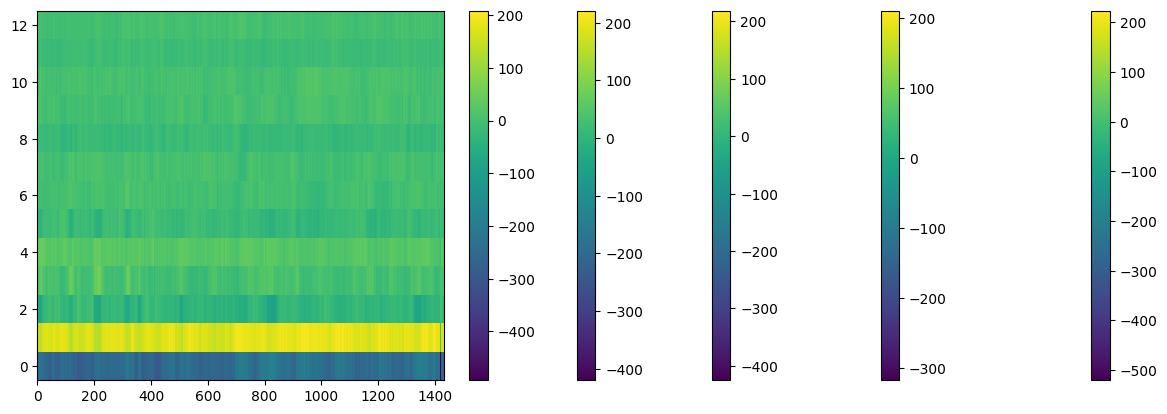

In [24]:
#plot some real mfccs
mel_kwargs={'n_fft':400,'hop_length':160,'n_mels':64,'center':False}
for i in range(0,5):
    print(listen_real['wavLocation'][i])
    audio, fs = torchaudio.load(listen_real['wavLocation'][i])
    mfcc_t=T.MFCC(sample_rate=fs/2,melkwargs=mel_kwargs,n_mfcc=13)
    mfcc=mfcc_t(audio)
   
    plt.imshow(mfcc[0],interpolation='nearest',origin='lower',aspect='auto')
    plt.colorbar()


In [51]:
listen_real[0]

'/code/dataset/FakeAVCeleb/FakeVideo-RealAudio/Caucasian (American)/men/id01201/00028_id03668_wavtolip.mp4.wav'

In [6]:
%matplotlib inline

In [51]:
dfReal

wavLocation  Audio_Label  \
0      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
1      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
2      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
3      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
4      /code/dataset/FakeAVCeleb/RealVideo-RealAudio/...            0   
...                                                  ...          ...   
10204  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0   
10205  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0   
10206  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0   
10207  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0   
10208  /code/dataset/FakeAVCeleb/FakeVideo-RealAudio/...            0   

        source   method          race gender                 type  
0      id00076     real       African    men  RealVideo-RealAudio  
1      id00166     real       African    men  RealVideo-RealAudio  
2      id00173     real       African    men  RealVideo-RealAudio  
3      id00366     real       African    men  RealVideo-RealAudio  
4      id00391     real       African    men  RealVideo-RealAudio  
...        ...      ...           ...    ...                  ...  
10204  id09181  wav2lip  Asian (East)  women  FakeVideo-RealAudio  
10205  id09181  wav2lip  Asian (East)  women  FakeVideo-RealAudio  
10206  id09181  wav2lip  Asian (East)  women  FakeVideo-RealAudio  
10207  id09181  wav2lip  Asian (East)  women  FakeVideo-RealAudio  
10208  id09181  wav2lip  Asian (East)  women  FakeVideo-RealAudio  

[10209 rows x 7 columns]

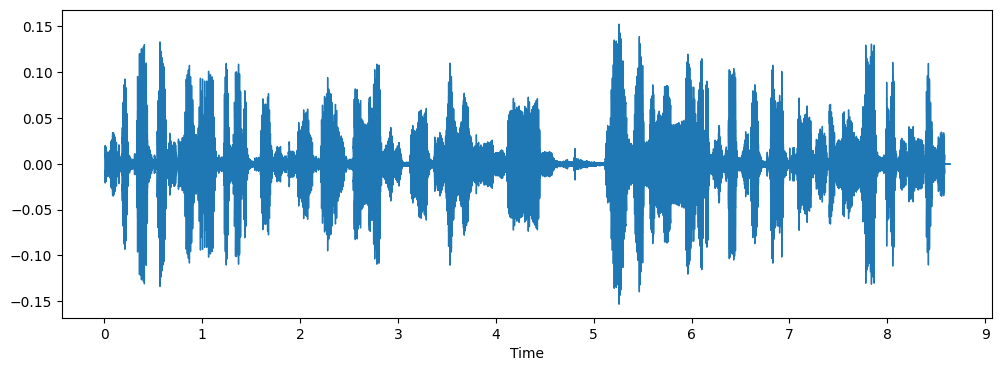

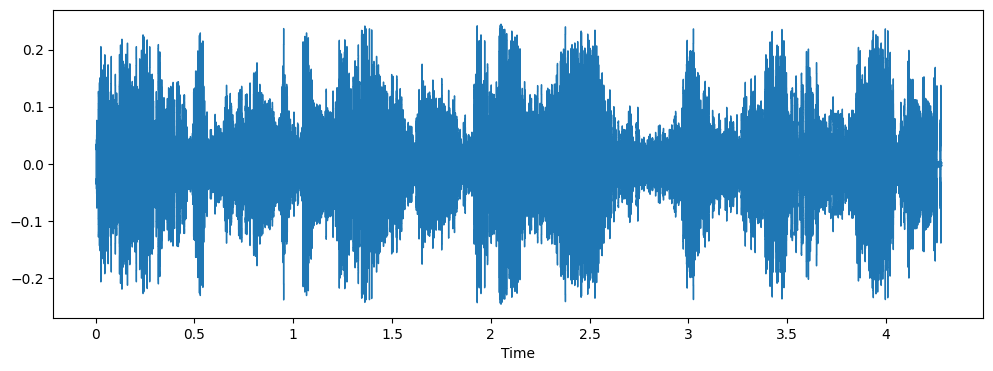

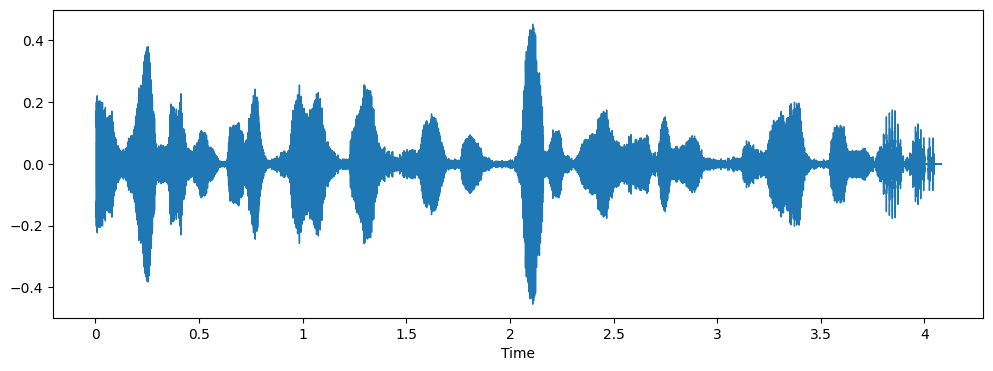

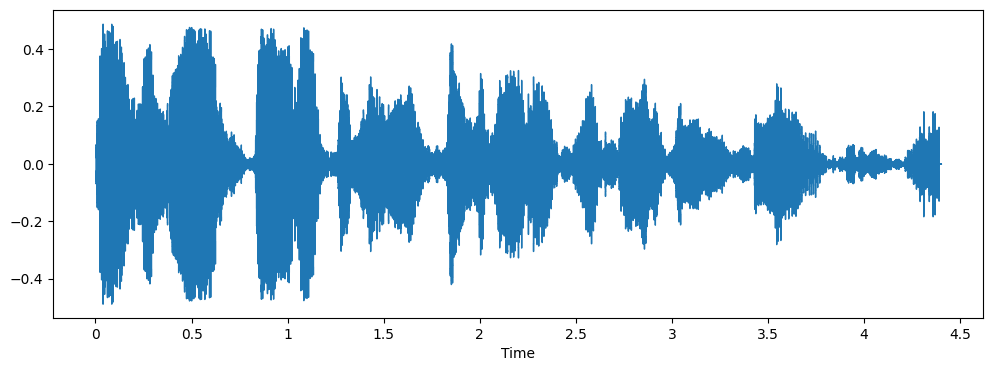

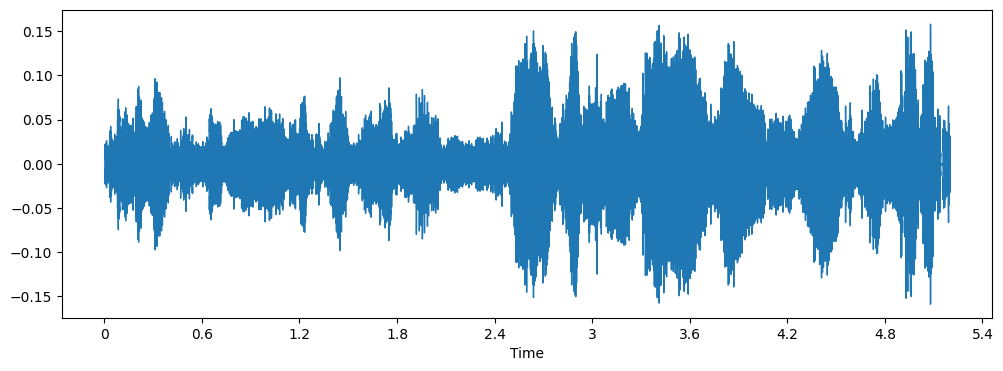

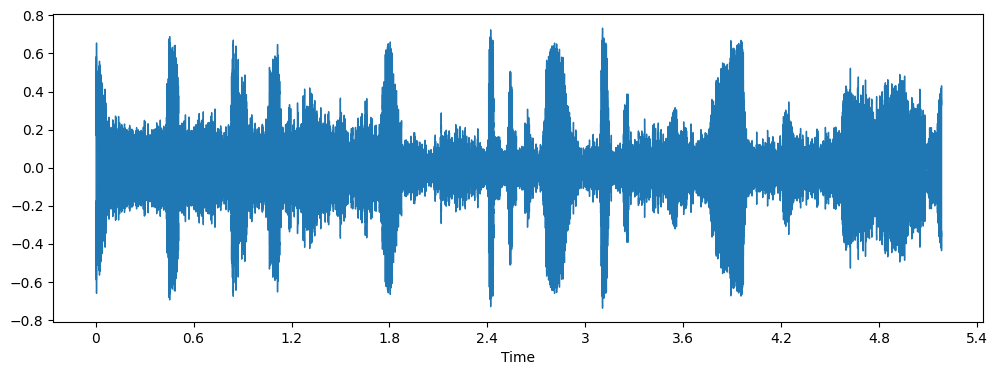

In [7]:
##real displays of some waveplots
listen_real_snip=listen_real[0:6]
real_data=[]
real_sampling_rate=[]
for i in range(0,len(listen_real_snip)):
    data,sampling_rate=librosa.load(listen_real_snip[i])
    plt.figure(figsize=(12,4))
    librosa.display.waveshow(data,sr=sampling_rate)
    real_data+=[data]
    real_sampling_rate+=[sampling_rate]
    
    plt.show()


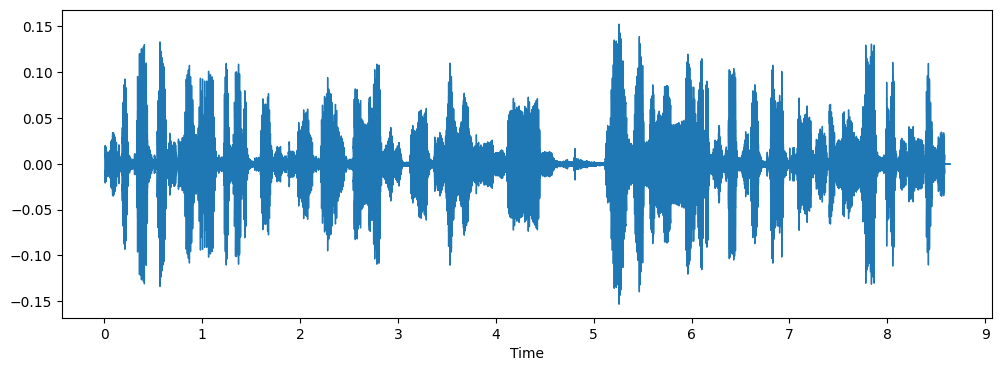

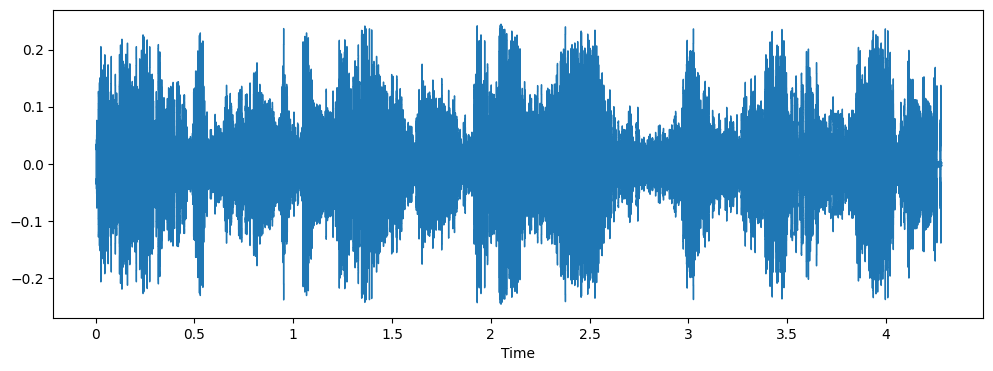

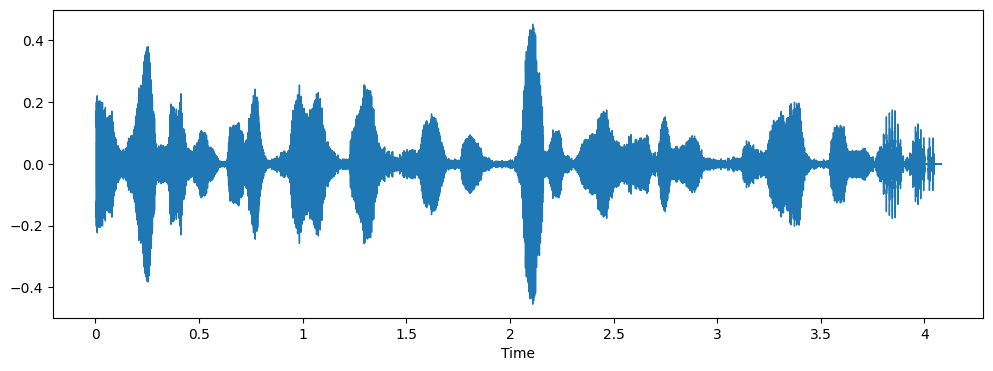

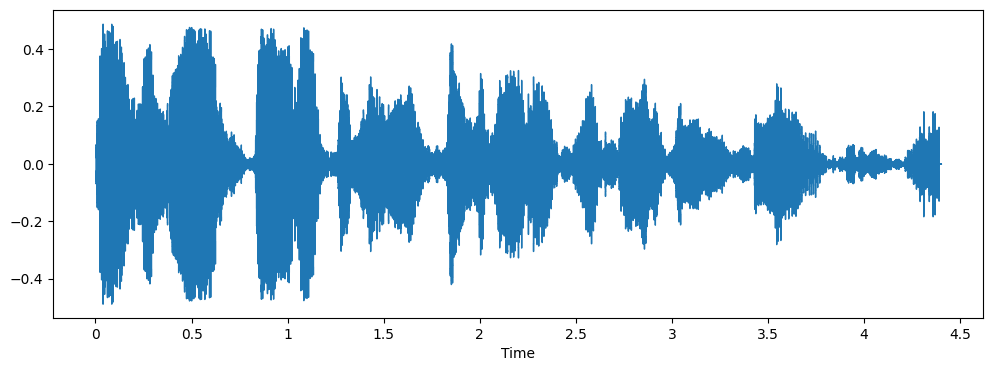

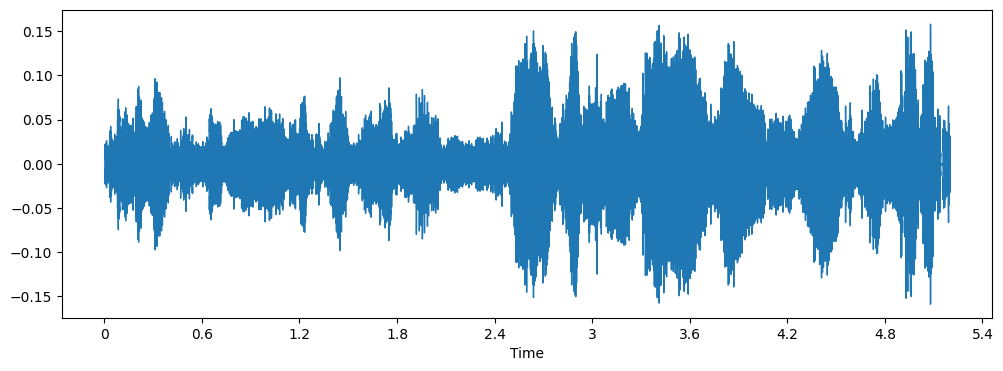

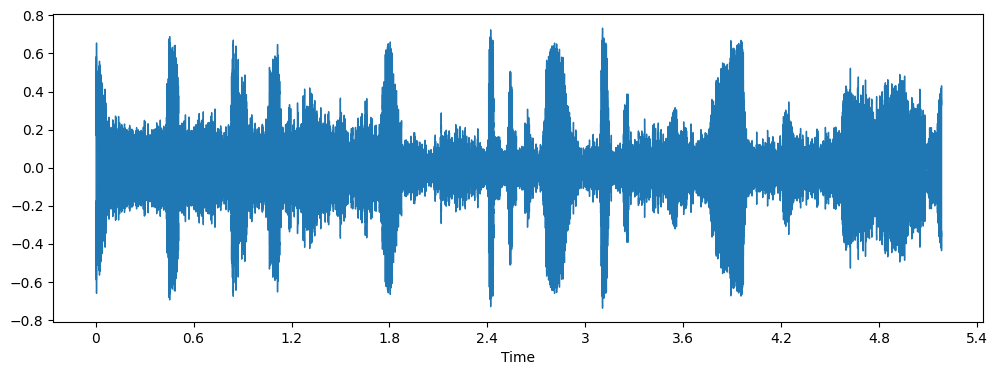

In [8]:
listen_fake_snip=listen_fake[0:6]
fake_data=[]
fake_sampling_rate=[]
for i in range(0,len(listen_real_snip)):
    data,sampling_rate=librosa.load(listen_real_snip[i])
    plt.figure(figsize=(12,4))
    librosa.display.waveshow(data,sr=sampling_rate)
    fake_data+=[data]
    fake_sampling_rate+=[sampling_rate]
    plt.show()


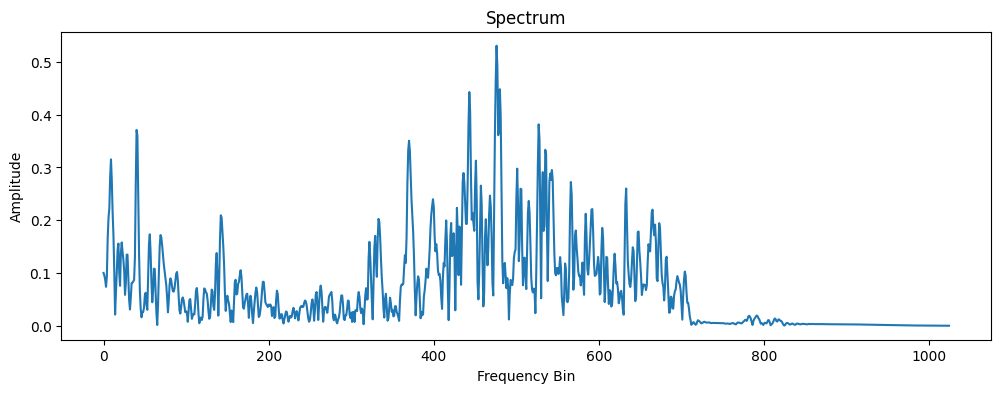

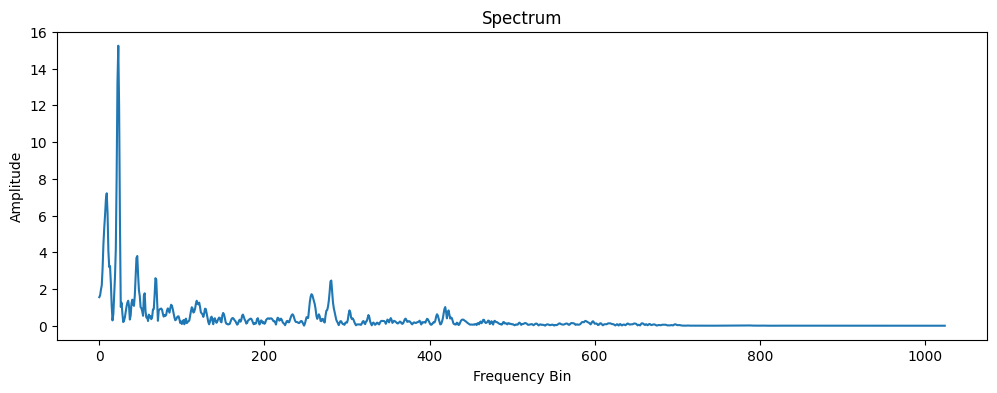

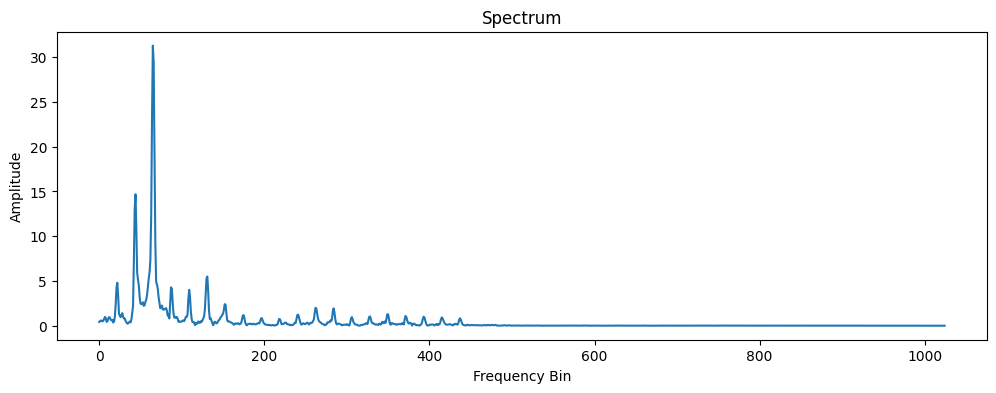

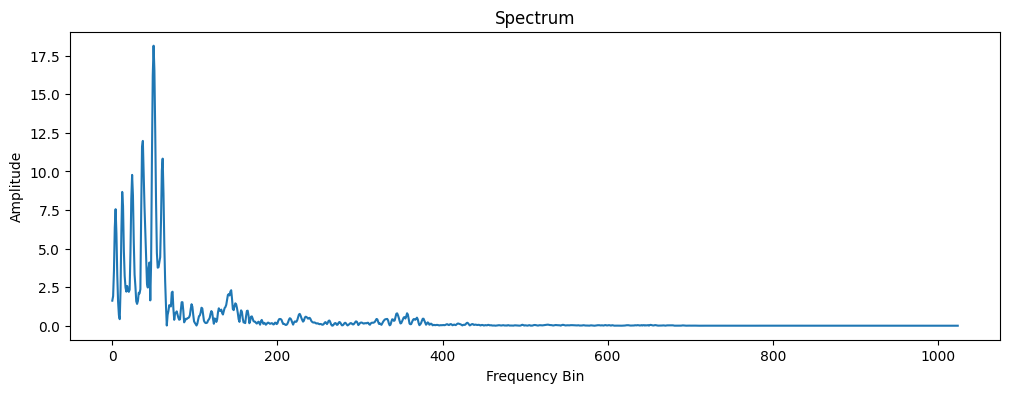

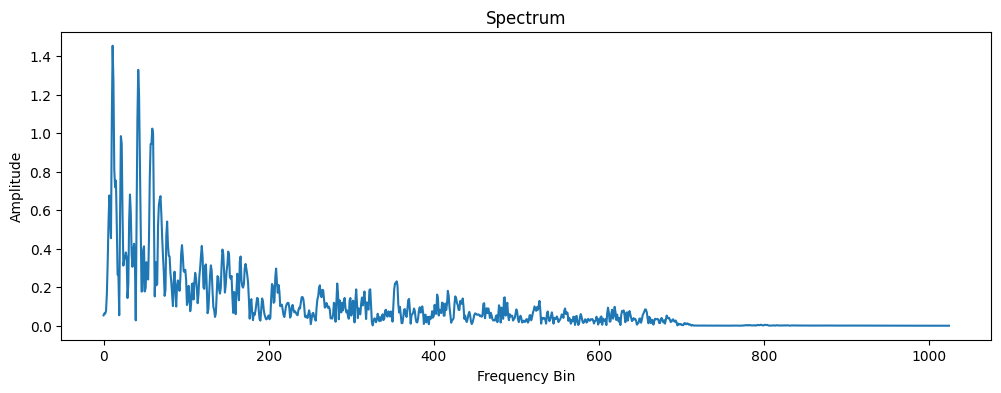

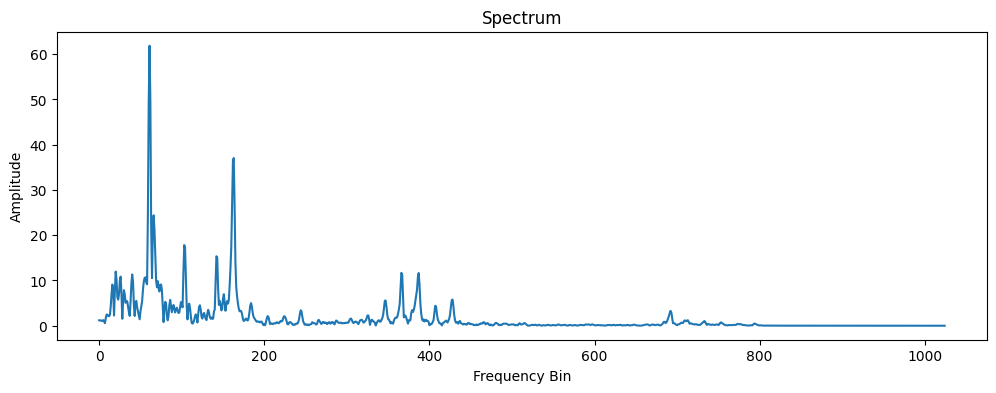

In [11]:
n_fft = 2048
ft_list_real=[]
for i in range(0,len(listen_real_snip)):
    plt.figure(figsize=(12,4))
    ft = np.abs(librosa.stft(real_data[i][:n_fft], hop_length = n_fft+1))
    plt.plot(ft)
    plt.title('Spectrum')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Amplitude')
    ft_list_real+=[ft]

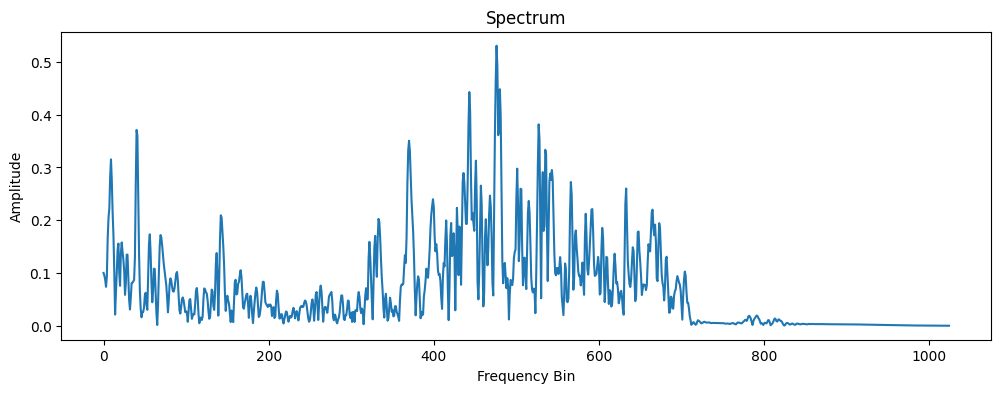

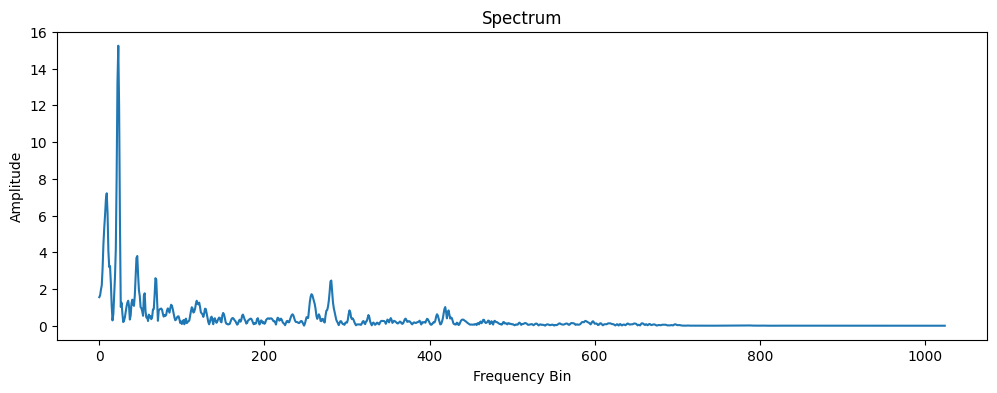

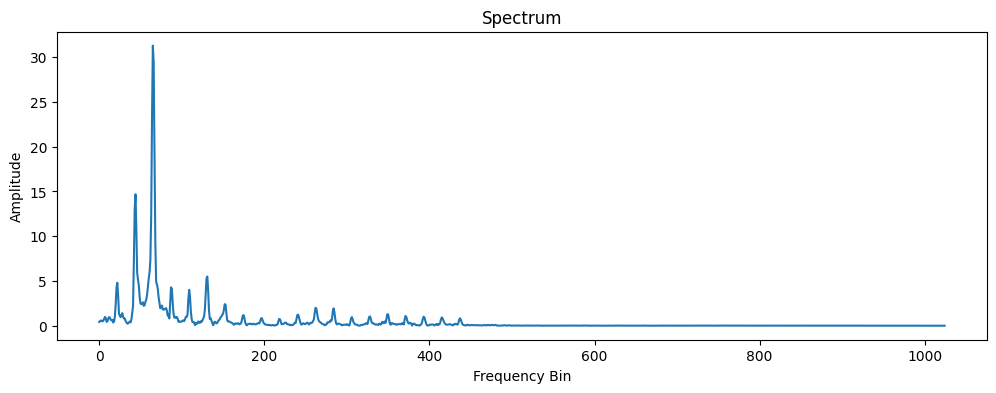

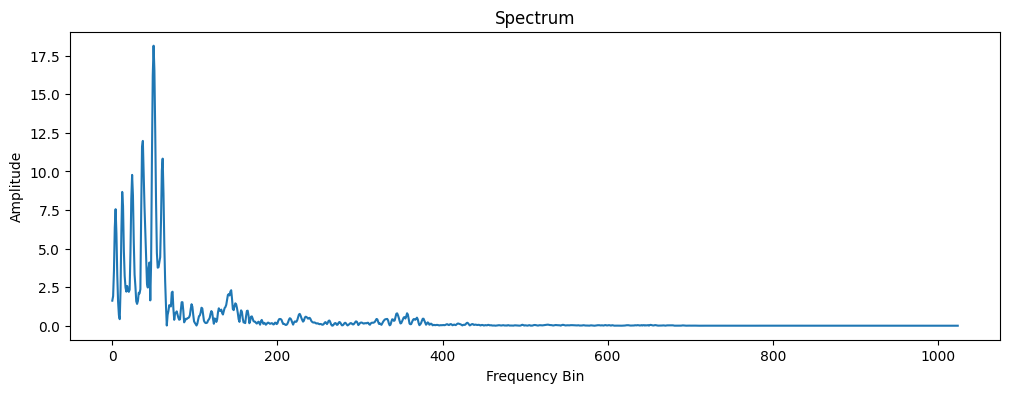

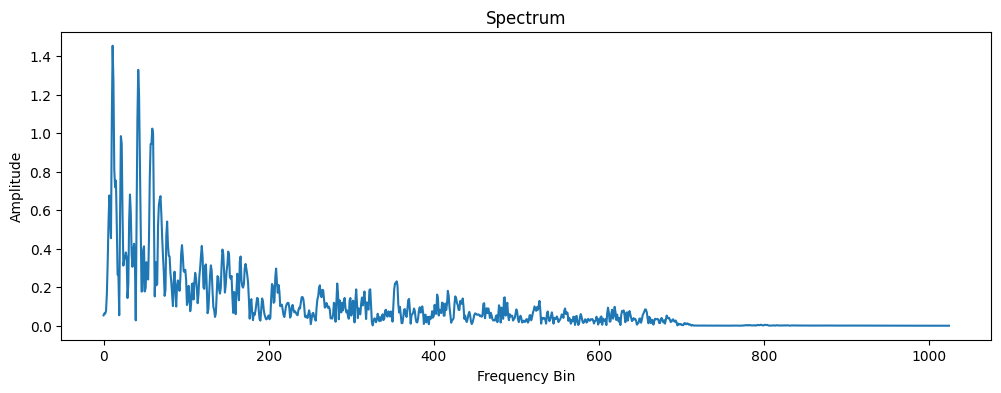

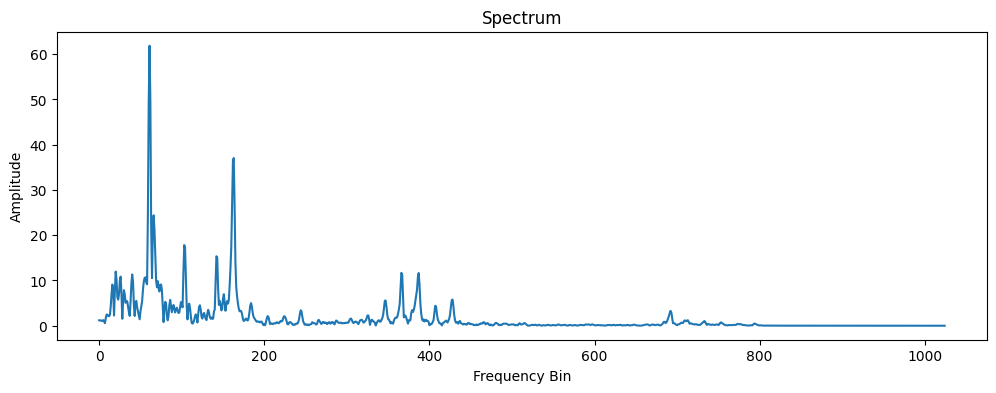

In [12]:
n_fft = 2048
ft_list_fake=[]
for i in range(0,len(listen_fake_snip)):
    plt.figure(figsize=(12,4))
    ft = np.abs(librosa.stft(fake_data[i][:n_fft], hop_length = n_fft+1))
    plt.plot(ft)
    plt.title('Spectrum')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Amplitude')
    ft_list_fake+=[ft]

In [64]:
real_sampling_rate

[22050, 22050, 22050, 22050, 22050, 22050]

In [61]:
len(ft_list_real)

6

In [35]:
len(fake_data[i])

114219

/tmp/ipykernel_58216/967474751.py:3: FutureWarning: Pass y=[-0.00431944  0.00051821  0.00705271 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(fake_data[i], sr=fake_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.


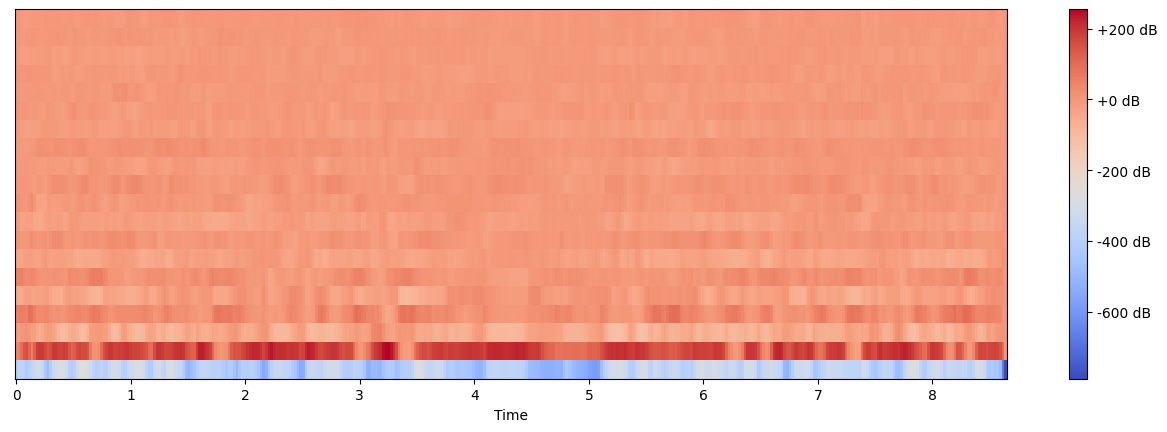

(20, 373)


/tmp/ipykernel_58216/967474751.py:3: FutureWarning: Pass y=[-0.00919343 -0.02426805 -0.03458581 ... -0.00192271 -0.00190372
 -0.00204465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(fake_data[i], sr=fake_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.


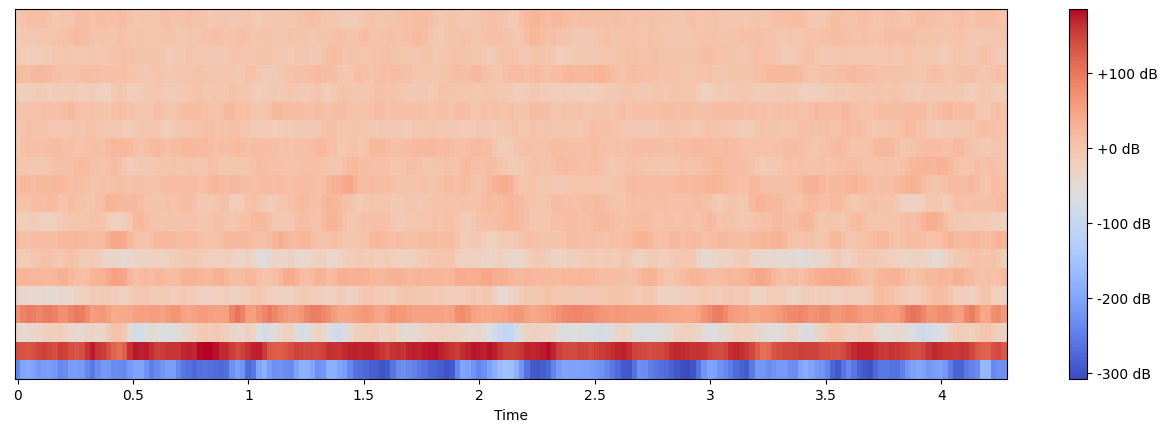

(20, 185)


/tmp/ipykernel_58216/967474751.py:3: FutureWarning: Pass y=[-2.0080678e-02 -3.6825061e-02 -4.8701141e-02 ...  2.9173654e-05
  3.1129082e-05  3.1094012e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(fake_data[i], sr=fake_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.


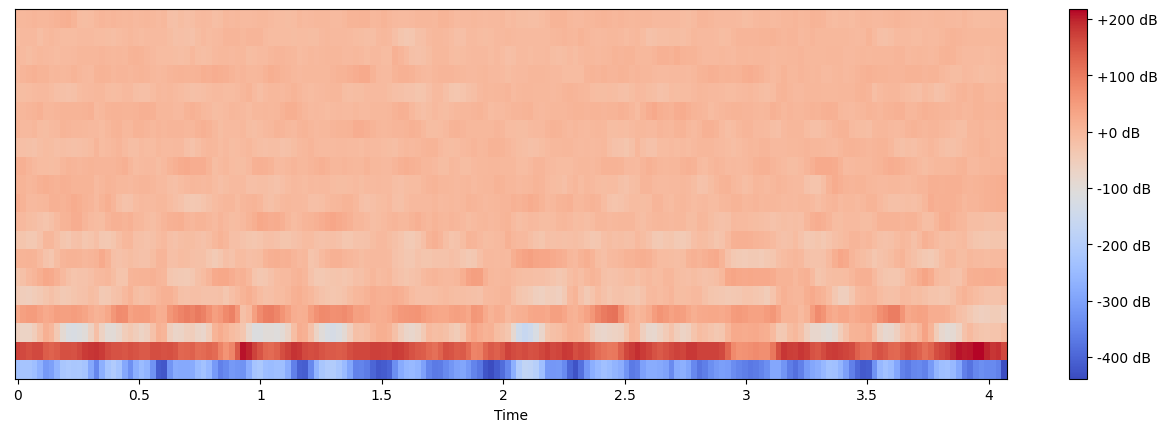

(20, 176)


/tmp/ipykernel_58216/967474751.py:3: FutureWarning: Pass y=[-0.00578475 -0.01181773 -0.01223354 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(fake_data[i], sr=fake_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.


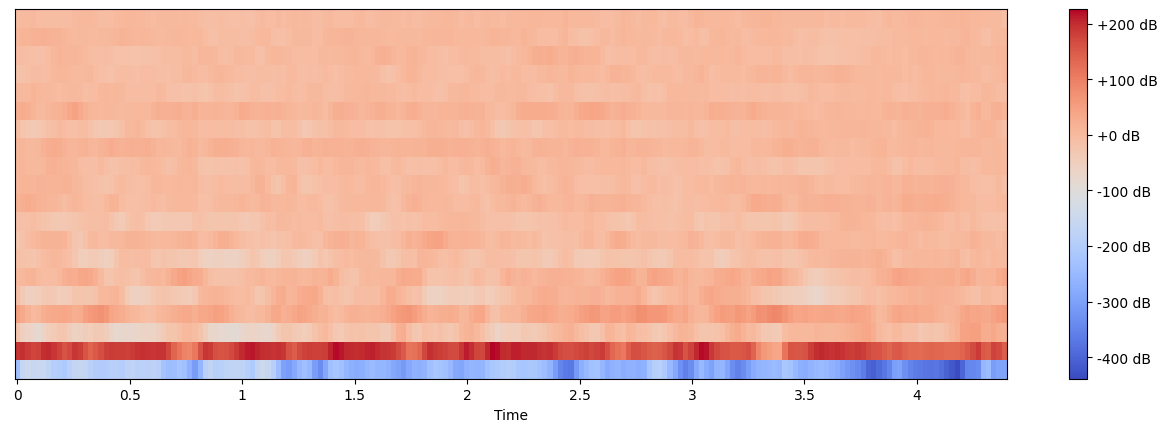

(20, 190)


/tmp/ipykernel_58216/967474751.py:3: FutureWarning: Pass y=[-0.00277869 -0.00511486 -0.00338357 ...  0.02604029  0.02604204
  0.02721925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(fake_data[i], sr=fake_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.


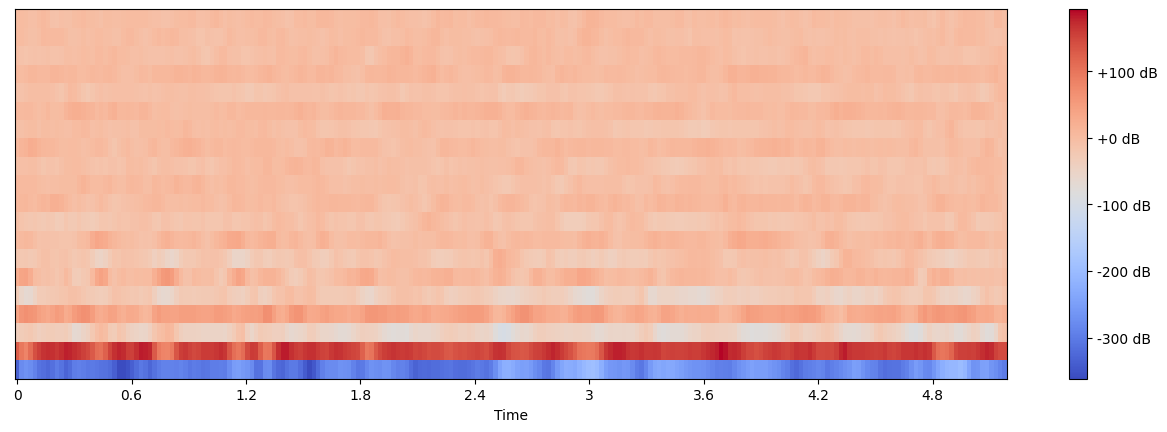

(20, 224)


/tmp/ipykernel_58216/967474751.py:3: FutureWarning: Pass y=[ 0.04279847  0.0184319  -0.189326   ... -0.18018198 -0.15101595
 -0.07863853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(fake_data[i], sr=fake_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.


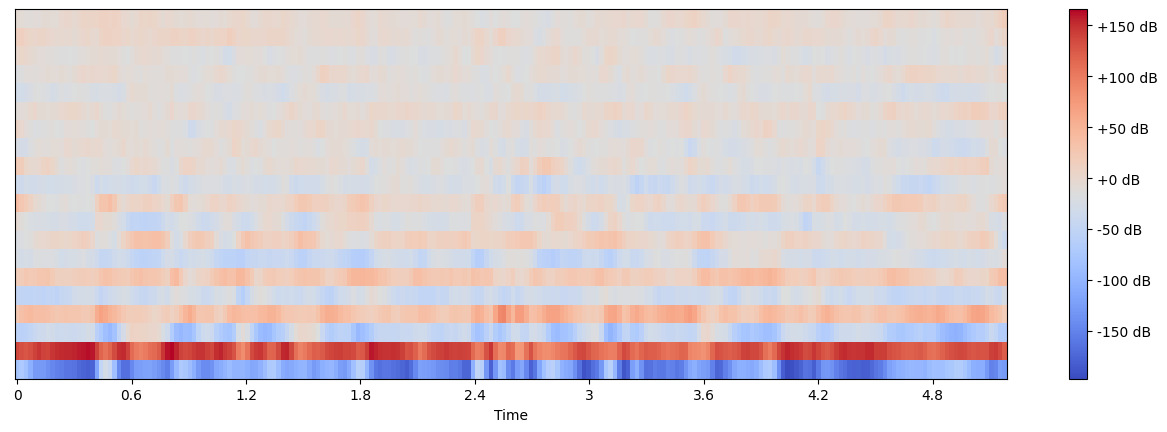

(20, 224)


In [17]:
fake_mfccs=[]
for i in range(0,len(fake_data)):
    mfccs = librosa.feature.mfcc(fake_data[i], sr=fake_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.
    librosa.display.specshow(mfccs, sr=fake_sampling_rate[i], x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.show()
    print(mfccs.shape)
    fake_mfccs+=[mfccs]


/tmp/ipykernel_58216/3990564716.py:3: FutureWarning: Pass y=[-0.00431944  0.00051821  0.00705271 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(real_data[i], sr=real_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.


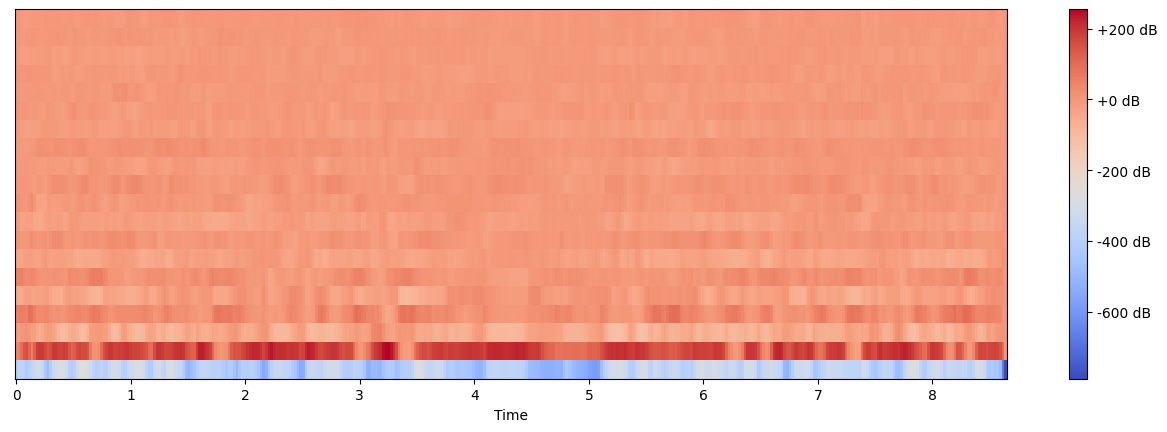

/tmp/ipykernel_58216/3990564716.py:3: FutureWarning: Pass y=[-0.00919343 -0.02426805 -0.03458581 ... -0.00192271 -0.00190372
 -0.00204465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(real_data[i], sr=real_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.


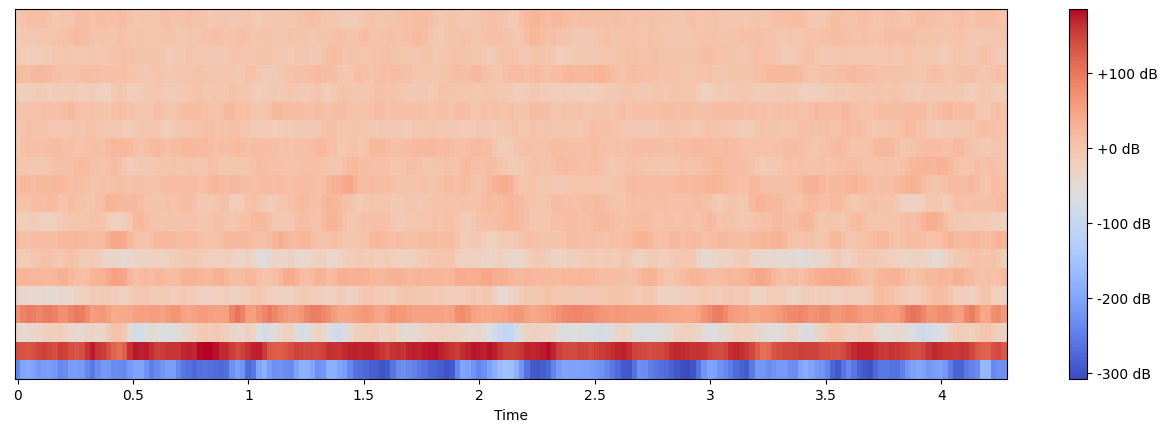

/tmp/ipykernel_58216/3990564716.py:3: FutureWarning: Pass y=[-2.0080678e-02 -3.6825061e-02 -4.8701141e-02 ...  2.9173654e-05
  3.1129082e-05  3.1094012e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(real_data[i], sr=real_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.


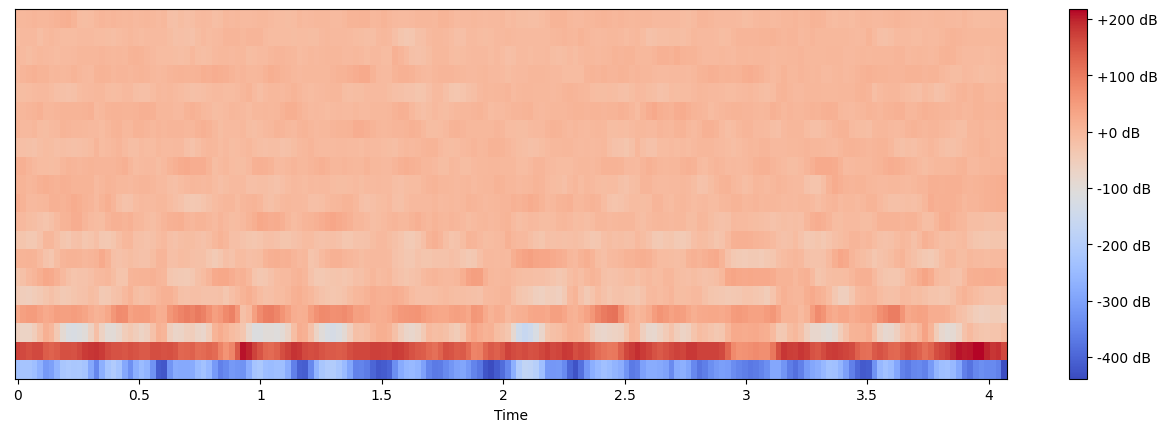

/tmp/ipykernel_58216/3990564716.py:3: FutureWarning: Pass y=[-0.00578475 -0.01181773 -0.01223354 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(real_data[i], sr=real_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.


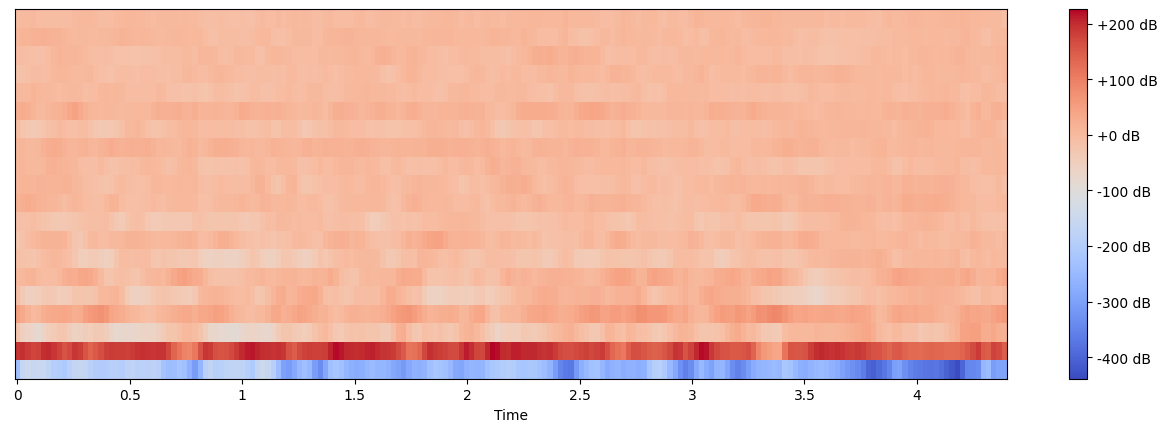

/tmp/ipykernel_58216/3990564716.py:3: FutureWarning: Pass y=[-0.00277869 -0.00511486 -0.00338357 ...  0.02604029  0.02604204
  0.02721925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(real_data[i], sr=real_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.


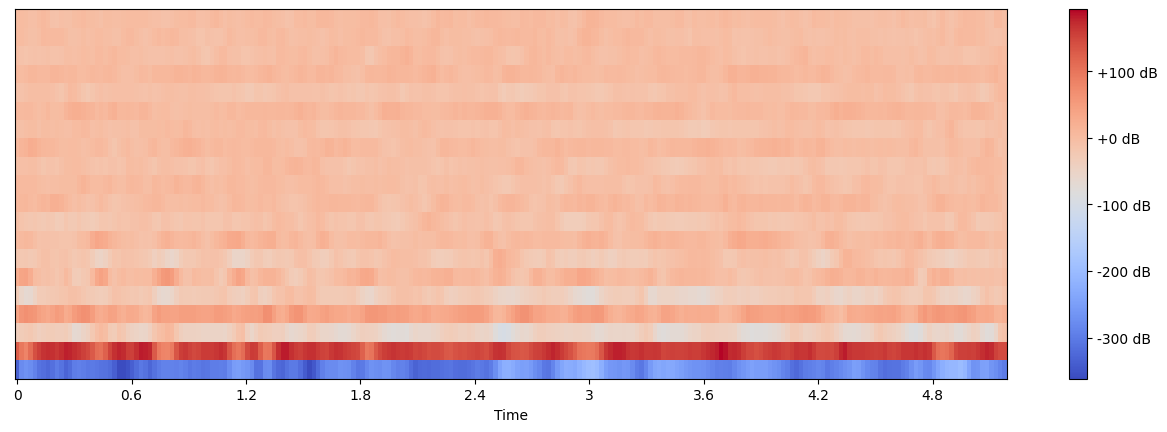

/tmp/ipykernel_58216/3990564716.py:3: FutureWarning: Pass y=[ 0.04279847  0.0184319  -0.189326   ... -0.18018198 -0.15101595
 -0.07863853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(real_data[i], sr=real_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.


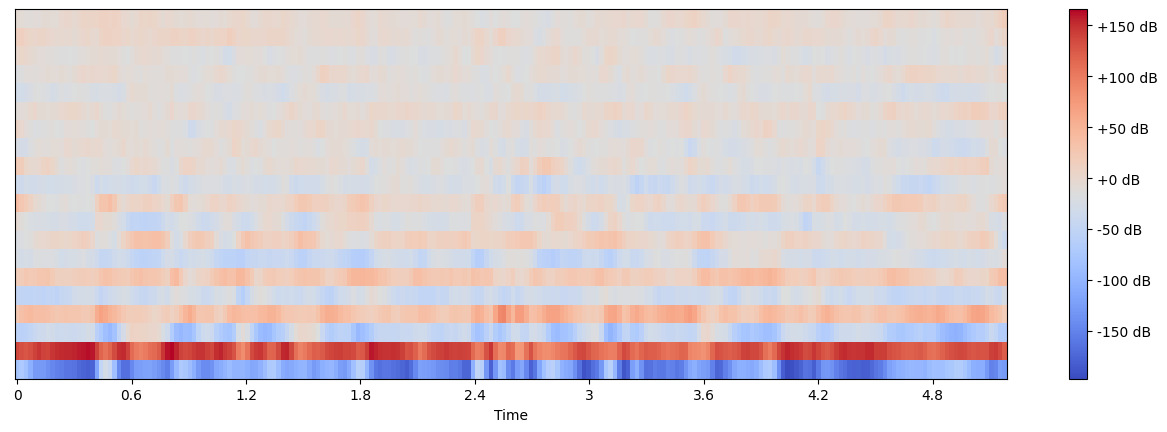

In [18]:
real_mfccs=[]
for i in range(0,len(real_data)):
    mfccs = librosa.feature.mfcc(real_data[i], sr=real_sampling_rate[i], n_mfcc=20,dtype=np.float64) #computed MFCCs over frames.
    librosa.display.specshow(mfccs, sr=real_sampling_rate[i], x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.show()
    real_mfccs+=[mfccs]

In [31]:
fake_mfccs[0][2][0]

-6.183548

In [37]:
fake_mfccs[0].shape

(20, 373)

In [15]:
type(fake_mfccs[0][0][0])

numpy.float32

In [19]:


#scale the MFCCs such that each coefficient dimension has zero mean and unit variance
real_m_scaled=[]
fake_m_scaled=[]
for i in range(0,len(real_mfccs)):
    real_m_scaled.append(sk.preprocessing.scale(real_mfccs[i],axis=1))
    fake_m_scaled.append(sk.preprocessing.scale(fake_mfccs[i],axis=1))

In [21]:
len(real_m_scaled)

6

In [23]:
real_m_scaled[1]

array([[-0.07129975,  1.10313686,  1.28503903, ..., -0.00885679,
         0.39664188,  0.302197  ],
       [-0.91717334, -1.22668919, -1.47368183, ..., -1.13200922,
        -0.72814346, -1.57075416],
       [ 0.23184739, -0.14485332, -0.01606863, ...,  1.25757323,
         0.73476607,  0.74791492],
       ...,
       [-0.55164061, -1.90018775, -2.37220828, ..., -0.22044153,
        -1.29133503, -0.88367777],
       [-3.13282172, -1.64857586, -1.14446829, ..., -0.94296787,
        -0.29267008,  0.09448939],
       [-1.43256485, -0.01381443,  1.0558452 , ...,  0.67734361,
         0.0622392 , -0.56331851]])

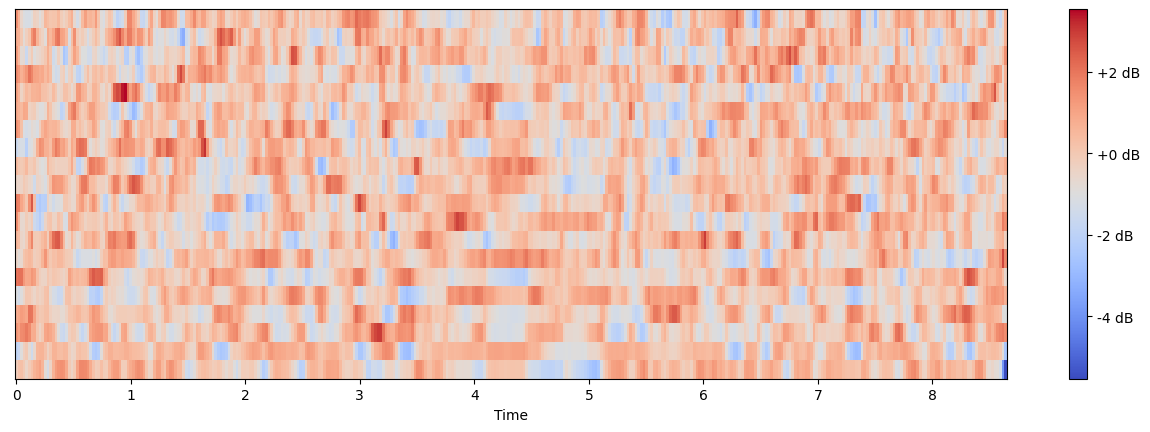

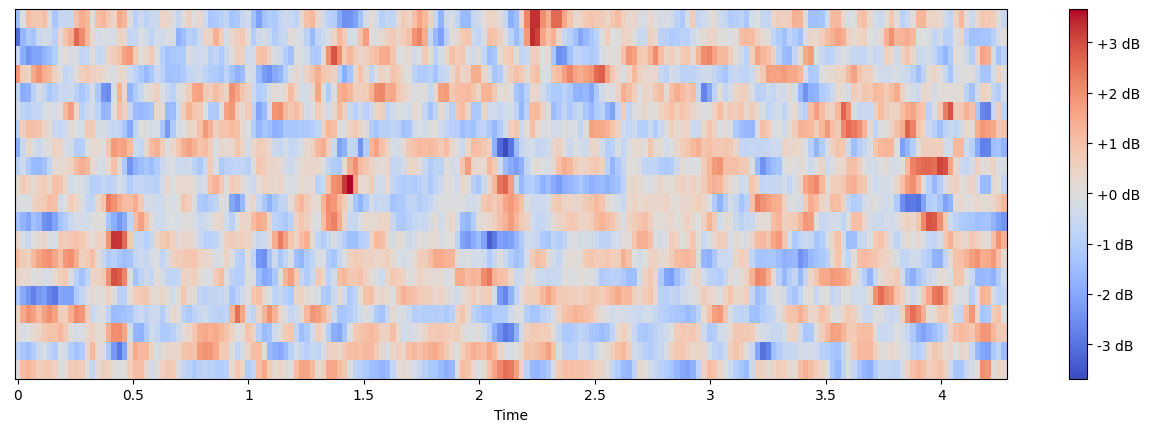

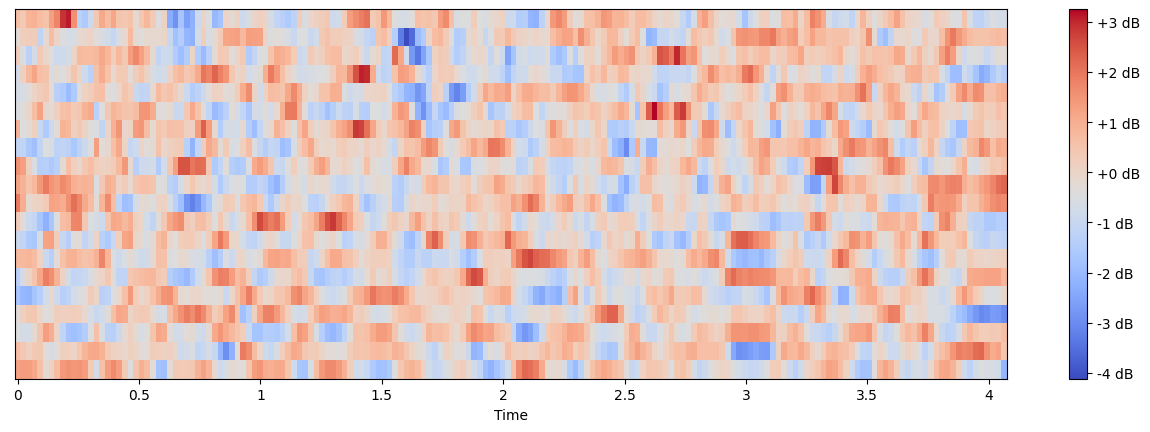

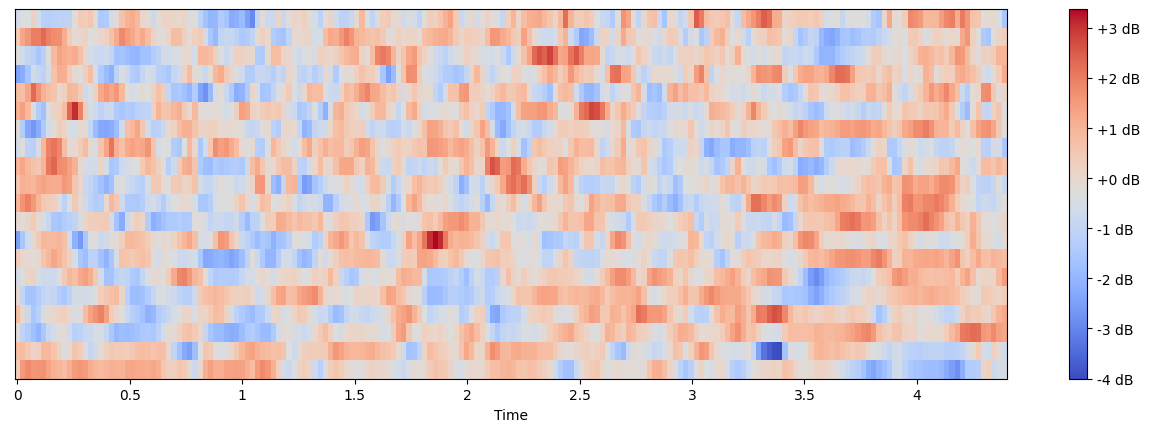

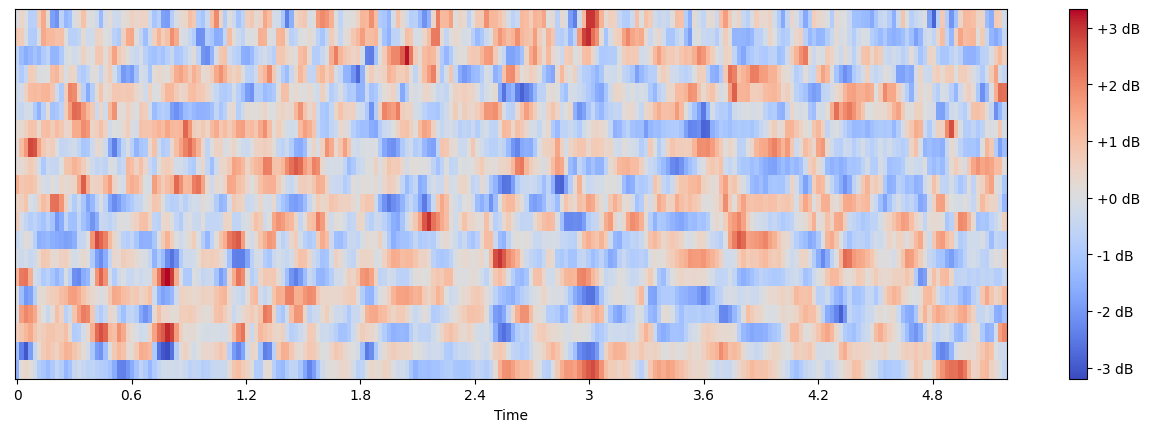

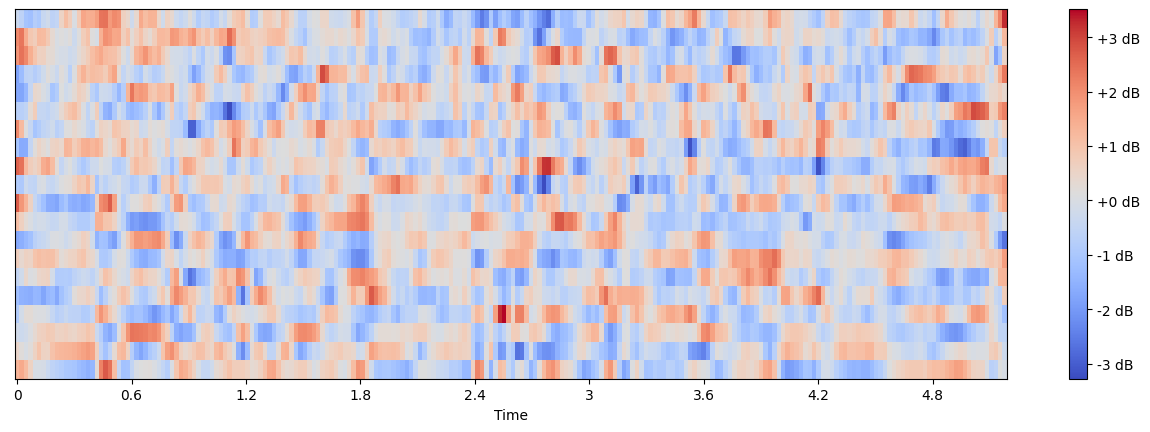

In [24]:
for i in range(0,len(real_m_scaled)):
    librosa.display.specshow(real_m_scaled[i], sr=real_sampling_rate[i], x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

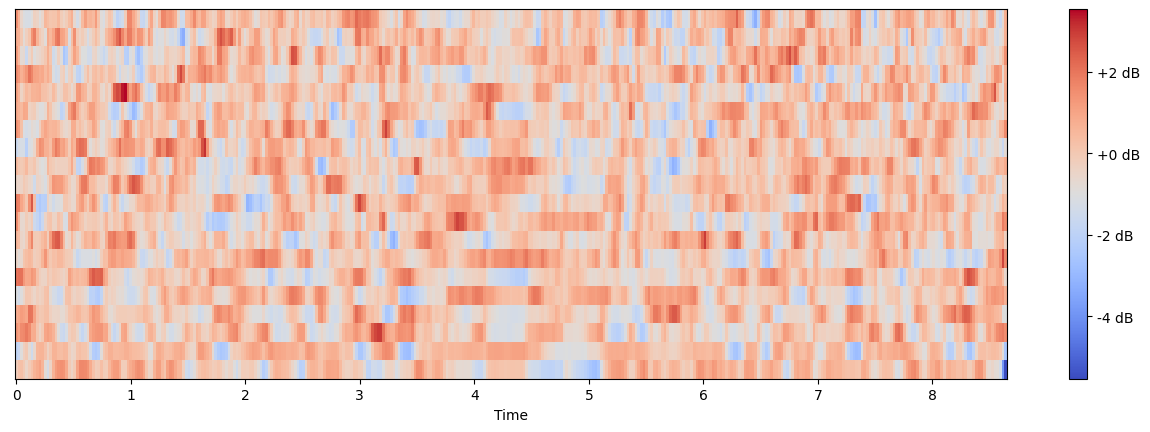

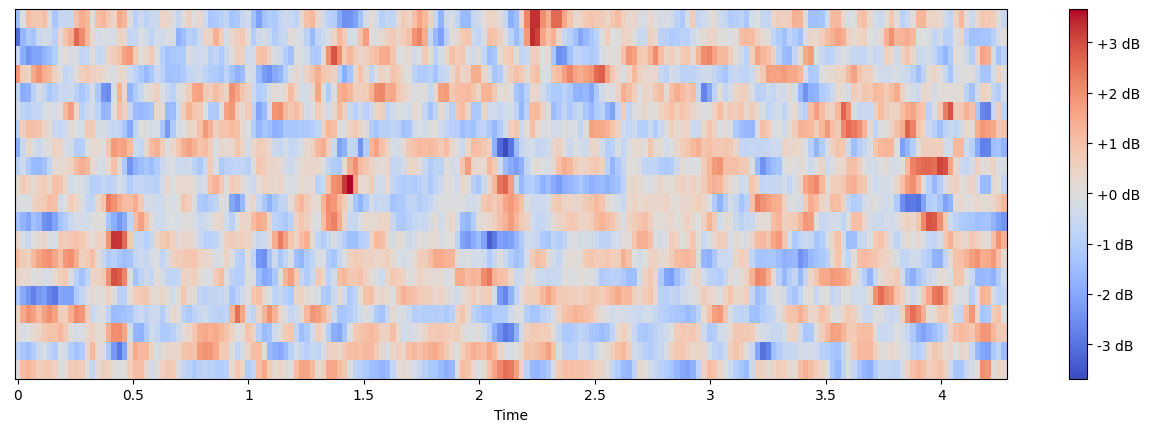

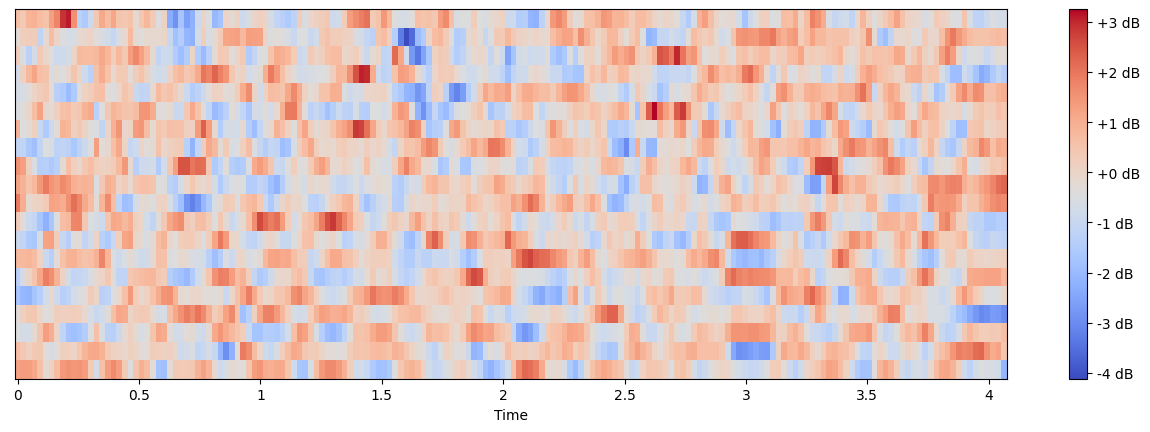

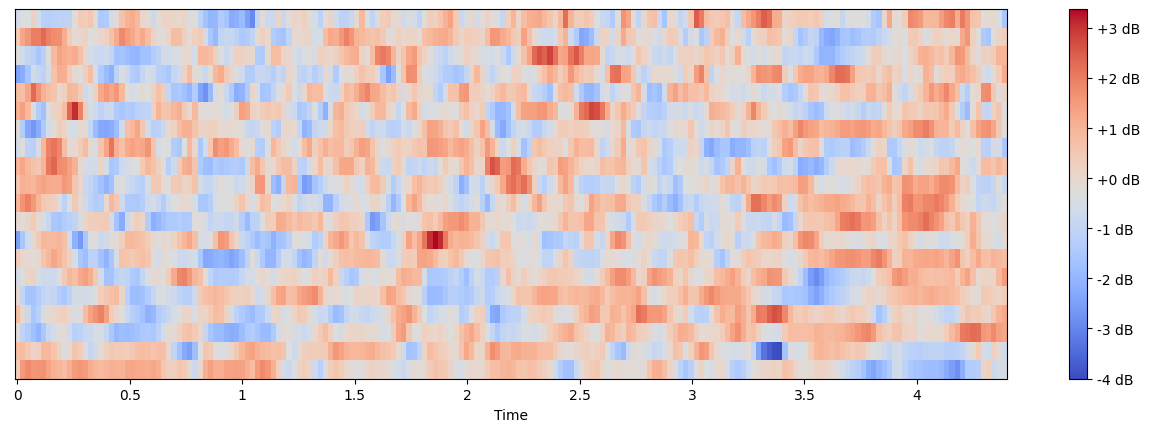

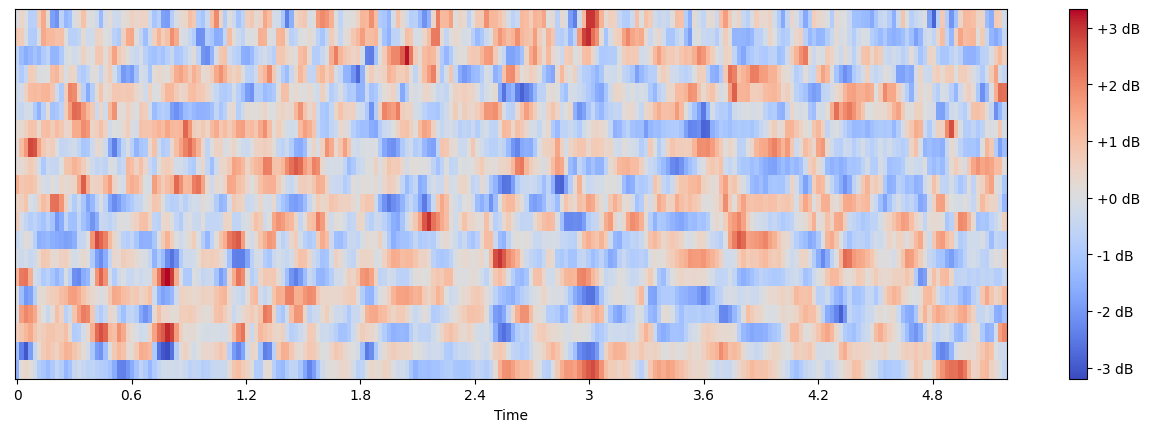

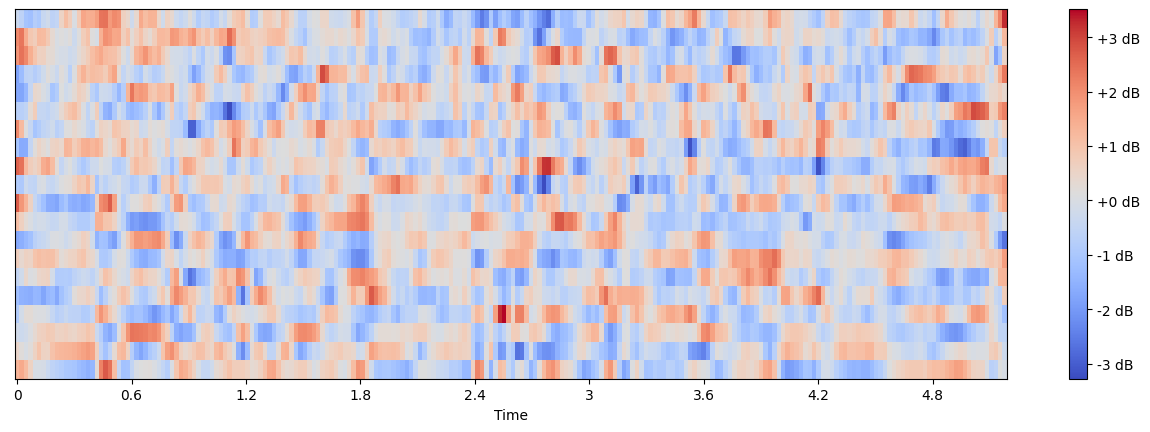

In [25]:
for i in range(0,len(real_m_scaled)):
    librosa.display.specshow(fake_m_scaled[i], sr=fake_sampling_rate[i], x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

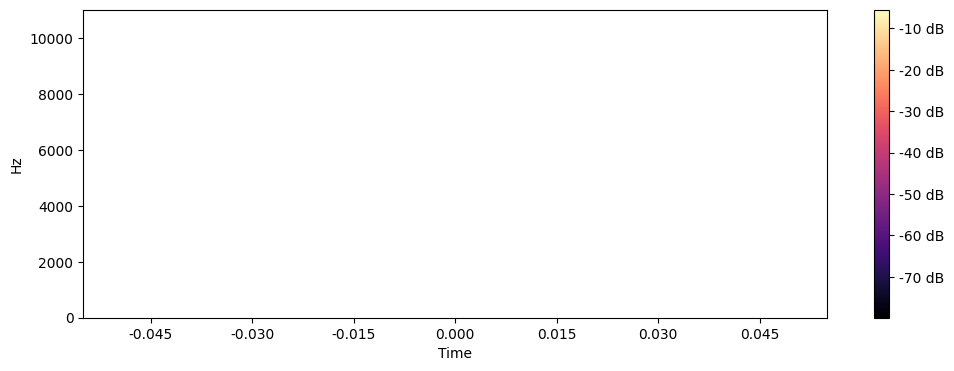

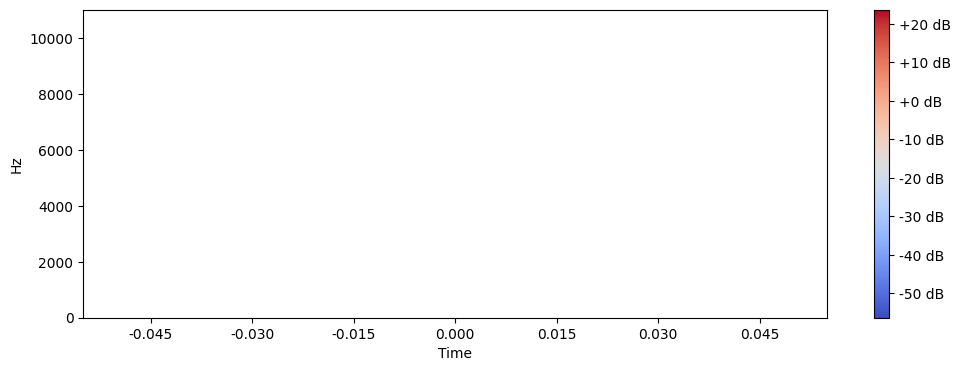

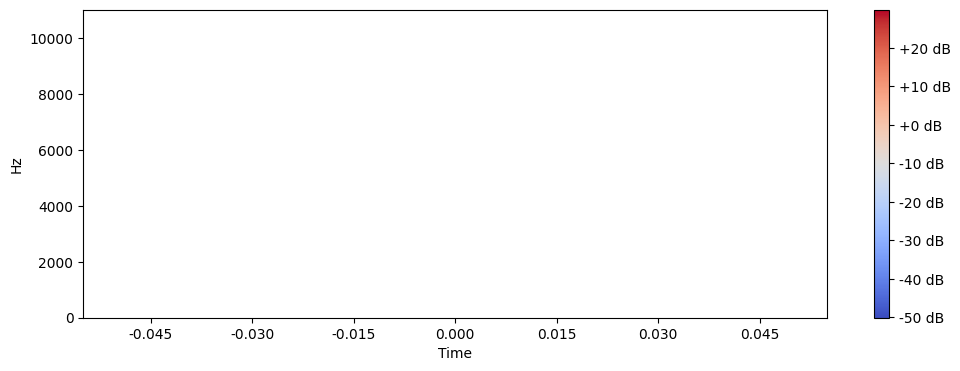

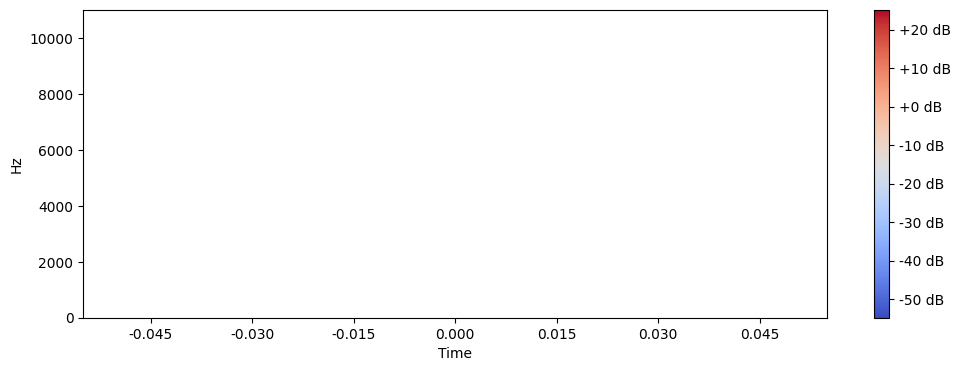

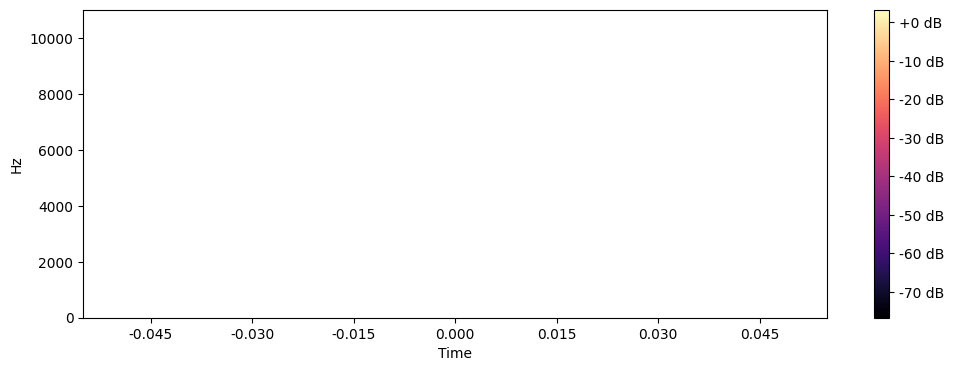

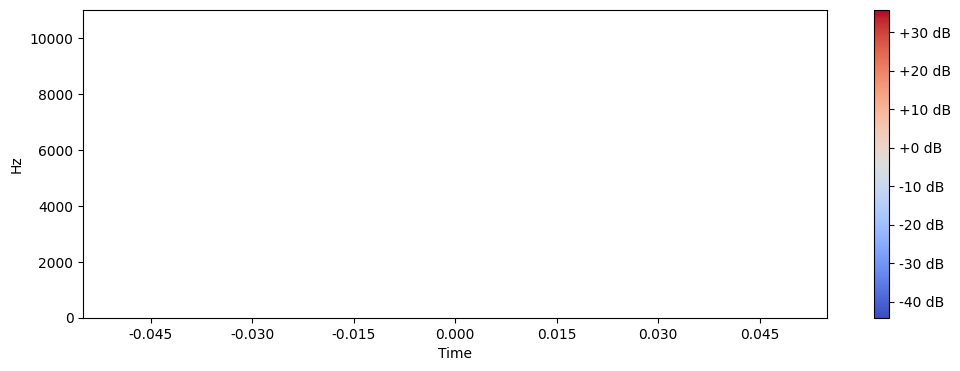

In [60]:
n_fft = 2048
for i in range(0,len(ft_list_real)):
    S = librosa.amplitude_to_db(abs(ft_list_real[i]))
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(S, sr=real_sampling_rate[i], hop_length=512, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

/tmp/ipykernel_73254/2611314785.py:2: FutureWarning: Pass y=[ 0.04279847  0.0184319  -0.189326   ... -0.18018198 -0.15101595
 -0.07863853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=13) #computed MFCCs over frames.


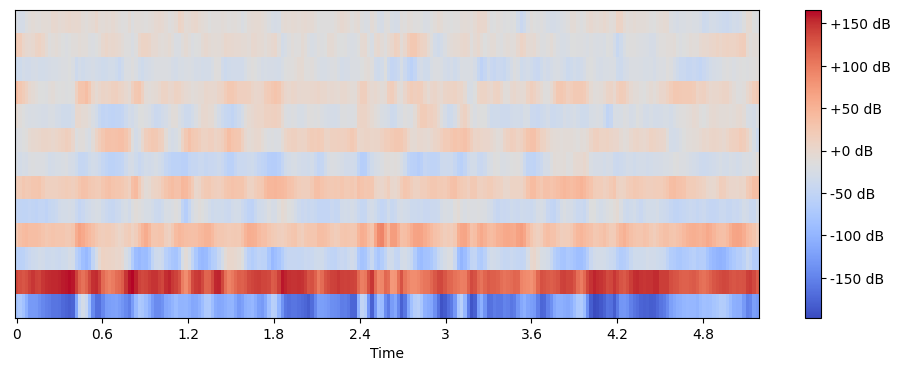

In [27]:
plt.figure(figsize=(12, 4))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=13) #computed MFCCs over frames.
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [13]:
#generate Mel spec for Real and Fake 

sample_real=listen_real
sample_fake=listen_fake
mel_real_list=[]
mel_fake_list=[]

n_fft = 1024
win_length = None
hop_length = 512
n_mels = 64
for i in range(0,len(sample_real)):
    waveform, sample_rate = torchaudio.load(listen_real[i])
    waveform2, sample_rate2 = torchaudio.load(listen_fake[i])
    
    mel_spectrogram = T.MelSpectrogram(
        sample_rate=sample_rate,
        n_fft=n_fft,
        win_length=win_length,
        hop_length=hop_length,
        center=True,
        pad_mode="reflect",
        power=2.0,
    norm='slaney',
        onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

    melspec_real = mel_spectrogram(waveform)
    melspec_fake = mel_spectrogram(waveform2)


mel_real_list+=[melspec_real]
mel_fake_list+=[melspec_fake]

In [14]:
#linear prediction cepstral coefficients(LFCCs)
#Bark frequency cepstral coefficients
#mel frequency cepstral coefficient
#cepstrum
#gammatone frequency cepstral

tensor([[[1.4267e-01, 1.2102e+00, 1.5235e+00,  ..., 2.1278e+00,
          7.0405e-01, 4.6563e-01],
         [1.5604e-01, 1.1455e+00, 1.3567e+00,  ..., 1.4433e+00,
          4.6018e-01, 7.7481e-02],
         [1.3949e+00, 3.5293e-01, 2.4989e-01,  ..., 3.1125e-01,
          4.8983e-01, 5.3831e-01],
         ...,
         [5.2078e-10, 4.2093e-10, 4.6677e-10,  ..., 5.7049e-10,
          7.4301e-10, 3.4363e-08],
         [7.0890e-10, 7.2201e-10, 5.4484e-10,  ..., 7.4998e-10,
          6.9304e-10, 3.0921e-08],
         [5.7016e-10, 6.9273e-10, 7.2460e-10,  ..., 7.3495e-10,
          7.1758e-10, 2.8518e-08]],

        [[1.4267e-01, 1.2102e+00, 1.5235e+00,  ..., 2.1278e+00,
          7.0405e-01, 4.6563e-01],
         [1.5604e-01, 1.1455e+00, 1.3567e+00,  ..., 1.4433e+00,
          4.6018e-01, 7.7481e-02],
         [1.3949e+00, 3.5293e-01, 2.4989e-01,  ..., 3.1125e-01,
          4.8983e-01, 5.3831e-01],
         ...,
         [5.2078e-10, 4.2093e-10, 4.6677e-10,  ..., 5.7049e-10,
          7.430

In [ ]:
real file

In [ ]:
####look at summary statistics across entire dfFake and dfReal

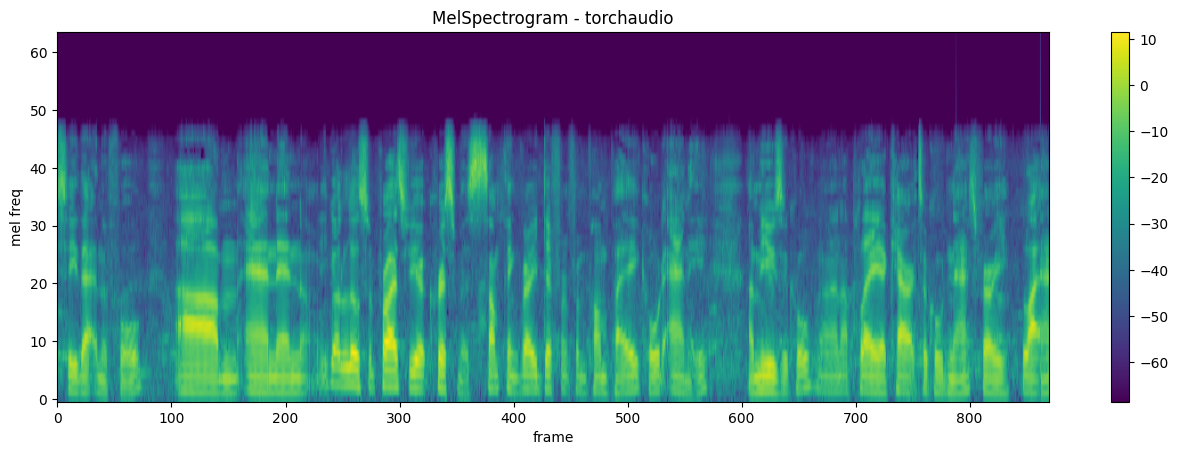

Shape: (2, 445410)
Dtype: torch.float32
 - Max:      0.308
 - Min:     -0.193
 - Mean:    -0.000
 - Std Dev:  0.030

tensor([[ 0.0013,  0.0037,  0.0088,  ..., -0.0242, -0.0225, -0.0195],
        [ 0.0013,  0.0037,  0.0088,  ..., -0.0242, -0.0225, -0.0195]])



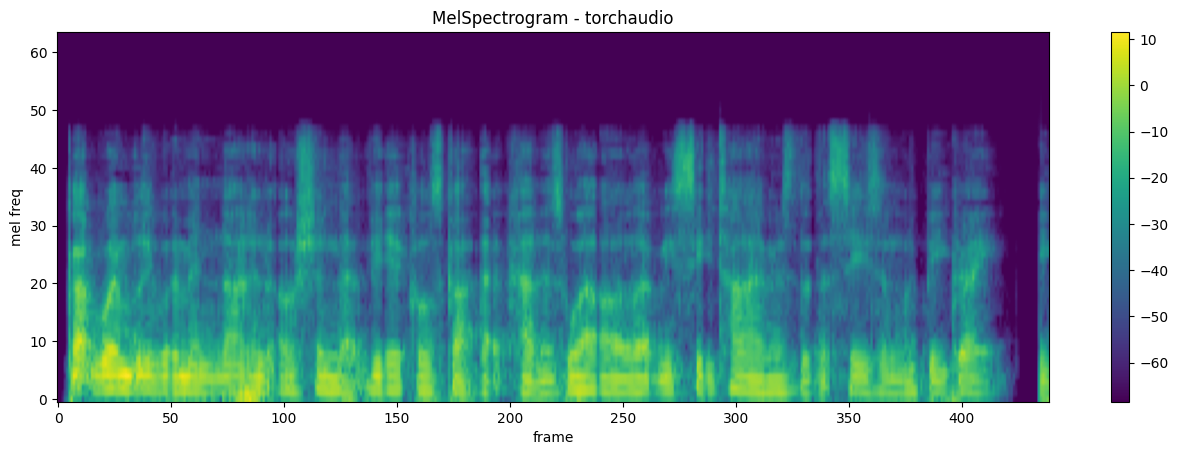

Shape: (2, 224469)
Dtype: torch.float32
 - Max:      0.365
 - Min:     -0.194
 - Mean:     0.000
 - Std Dev:  0.029

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0272, -0.0271, -0.0269],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0272, -0.0271, -0.0269]])



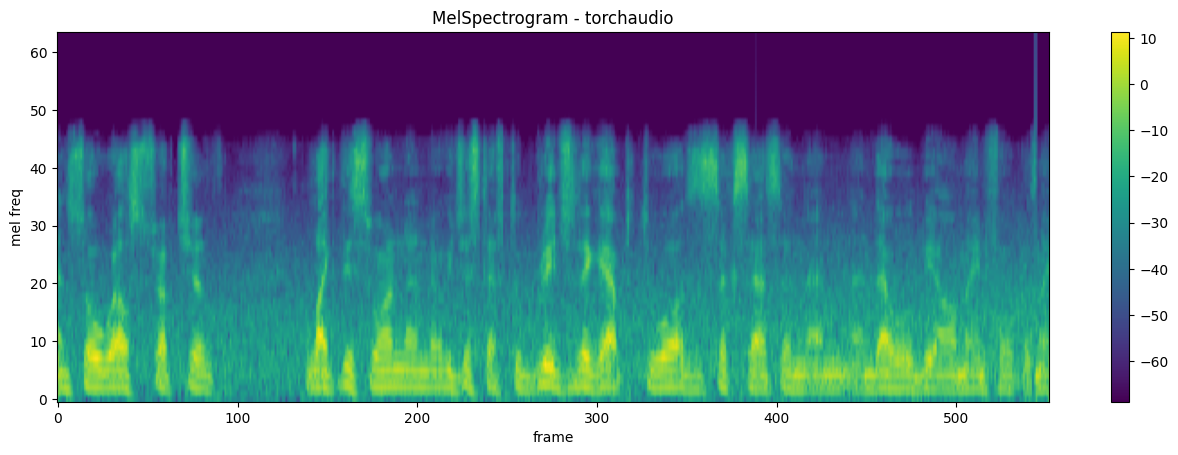

Shape: (2, 282240)
Dtype: torch.float32
 - Max:      0.261
 - Min:     -0.172
 - Mean:    -0.000
 - Std Dev:  0.032

tensor([[-0.0055, -0.0061, -0.0078,  ..., -0.0187, -0.0216, -0.0241],
        [-0.0055, -0.0061, -0.0078,  ..., -0.0187, -0.0216, -0.0241]])



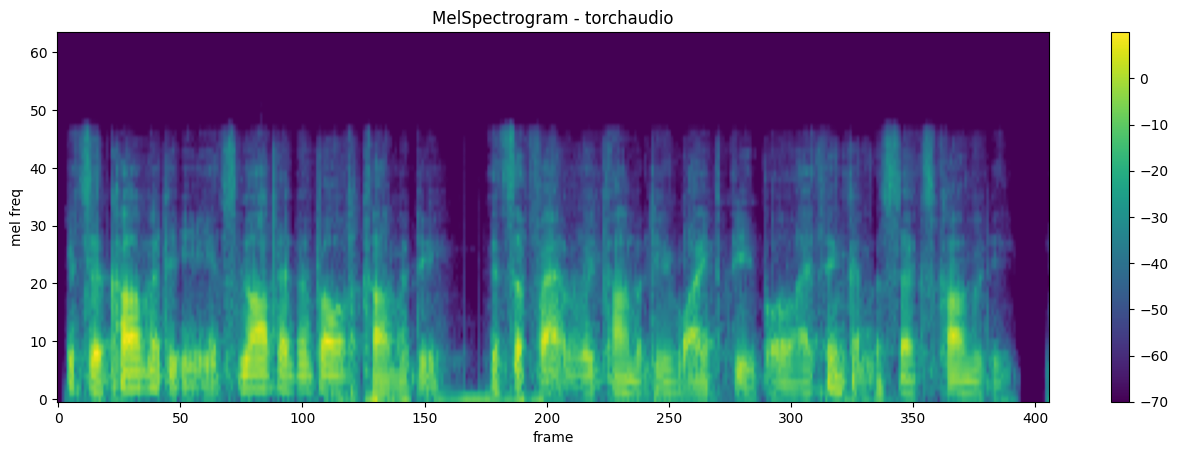

Shape: (2, 207711)
Dtype: torch.float32
 - Max:      0.191
 - Min:     -0.413
 - Mean:    -0.000
 - Std Dev:  0.024

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0016, -0.0016, -0.0016],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0016, -0.0016, -0.0016]])



In [9]:
#display 2 real audio files and 2 fake audio files (order: R,F,R,F)

wavPathSampleset=[dfTraining['wavLocation'][0],dfTraining['wavLocation'][10000],dfTraining['wavLocation'][3000],dfTraining['wavLocation'][12000]]
#melsprectorgram
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 64
for i in range(0,4):
    waveform, sample_rate = torchaudio.load(wavPathSampleset[i])
    mel_spectrogram = T.MelSpectrogram(
        sample_rate=sample_rate,
        n_fft=n_fft,
        win_length=win_length,
        hop_length=hop_length,
        center=True,
        pad_mode="reflect",
        power=2.0,
    norm='slaney',
        onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

    melspec = mel_spectrogram(waveform)
    plot_spectrogram(
        melspec[0], title="MelSpectrogram - torchaudio", ylabel='mel freq')
    print_stats(waveform)